# Pràctica 8: Recommender Systems

#### NOM: Gerard Santacatalina Rubio 
#### NIU: 1534002


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Recomenadors No Personalitzats **(20%)**
* B. Recomenadors k-NN **(30%)**
* C. Recomenadors SVD **(50%)**

## Datasets

#### MovieLens-Latest-Small

Farem ús de la base de dades de qualificacions de pel·lícules de [MovieLens](https://grouplens.org/datasets/movielens/). Existeixen varies mides del dataset. Per aprendre'n com funciona la base dels recomenadors, farem servir la versió petita. **Us l'heu de descarregar**:

- [Small](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. (Last updated 9/2018.). [Aqui](https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k) podeu veure els darrers articles publicats al respecte.

#### MovieLens-Latest
La última versió d'aquesta base de dades, **que no farem servir**, però posem com a referència
- [Full](http://files.grouplens.org/datasets/movielens/ml-latest.zip): 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

#### Netflix Grand-Prize
Teniu una explicació del que va passar a la [wikipedia](https://en.wikipedia.org/wiki/Netflix_Prize). Les dades d'entrenament contenien 100,480,507 ratings de 480,189 usaris sobre 17,770 pelicules.

- [challenge 2006-2009](https://www.kaggle.com/netflix-inc/netflix-prize-data)

Com a orientació, les dades actuals de Netflix és de més de 150,000,000 d'usuaris i varis milers películes i sèries de televisió.



## Llibreria

Existeixen moltes llibreries i codis per a realitzar sistemes recomenadors. A continuació us en poso el que farem servir:

#### LensKit Python
- [LKPy](https://github.com/lenskit/lkpy)

Per instal·lar la versió actual, podeu fer servir Anaconda:

`conda install -c lenskit lenskit`

O amb pip:

`pip install lenskit`

#### Altres llibreries interessants
- [Surprise](http://surpriselib.com/) 5.1k stars a github. Molt popular.
- A la web, [paperswithcode](https://paperswithcode.com/), teniu codi actual utilitzat pels darreres grups de recerca en articles científics. Hi trobareu un recopilatori de repositoris i trobareu resumit un ranking dels mètodes per tal d'ajudar a la recerca. En el cas de [recomenadors](https://paperswithcode.com/task/recommendation-systems), podeu veure quina és la tendència actual.





## Introducció

En aquesta pràctica aprendrem sobre sistemes recomenadors, com són les dades, quins mètodes existeixen per a predir qualificacions (ratings) a pel·lícules, fer recomenacions basat en les qualificacions, i veure les diferents formes per evaluar-ho.

Actualment, són sistemes molt utilitzats i gairebé podriem dir que esencials, en diferents sectors online (e.g. YouTube videos, Netflix shows, Amazon products).

Podem veure-hi dues tendències:
<img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width="500px">
* **Content filtering**: les recomenacions provenen de descriure el contingut dels items i llavors recomenar items similars.
* **Collaborative filtering**: les recomenacions provenen de l'ús dels items pels clients, és a dir, trobar relacions entre quins items agraden a quins usuaris i recomenar aquells llavors.

També es poden distingir clarament dos tipus de formes d'extreure les qualificacions:
* **Explicit rating**: els usuaris posen nota o qualifiquen les pel·lícules segons el seu gust.
* **Implicit rating**: les qualificacions provenen de l'ús de l'usuari, sense que aquest hagi d'especificar si li agrada o no. És més fàcil d'aconseguir, però no es té un grau de certesa tan gran com en el cas anterior. Un exemple són els clicks en una botiga online, on es solen recomenar nous items segons el nostre historial de visualitzacions.


Per tal de fer-ho més interactiu, us comparteixo un fitxer amb algunes qualificacions d'un usuari: `user-movie-ratings.csv`. El que intentarem és trobar una pel·lícula a veure que pugui agradar tan a vosaltres com a l'usuri, per això, el primer que haureu de fer és **omplir la vostra pròpia llista de qualificacions** omplint el fitxe `my-movie-ratings.csv`. 

Els diferents apartats farán ús de diferents tipus de recomenacions:

* El primer apartat aplicarem recomenacions no personalitzades, és a dir, mètodes que no tinguin en compte el que ens agradi a nosaltres, sinó recomenacions genèriques basades amb el que li ha agradat als altres usuaris. Ens servirà com a baseline per si no es coneix res d'algun usuari (per exemple al principi quan es donen d'alta, o veure tendències globals)
  També aprendrem a com evaluar sistemes que tinguin en compte el ranking
* En el següent apartat, aplicarem mètodes de recomenació basats en k-NN. Hi aplicarem mètodes de filtratge colaboratiu User-User i Item-Item.
  <img src="https://miro.medium.com/max/1400/1*QvhetbRjCr1vryTch_2HZQ.jpeg" width="500">
  Aquí aplicarem mètodes que requereixin un aprenentatge sobre dades dels clients als que volem predir.
* Finalment, provarem mètodes basats en la factorització de matrius (SVD). A partir d'aquests, s'han desenvolupat la majories dels mètodes més utilitzats en la actualitat.
  <img src="https://miro.medium.com/max/5130/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="600">

Començarem descarregant el dataset, descomprimint-lo i [llegint les dades del dataset](https://lkpy.readthedocs.io/en/stable/datasets.html) (el contingut ha de trobar-se a *./ml-latest-small/*)

In [2]:
import lenskit.datasets as ds
import pandas as pd

data = ds.MovieLens('ml-latest-small/')
print("Successfully installed dataset.")

És important entendre com s’estructura un conjunt de dades i assegurar-se que el conjunt de dades s’importa correctament. Imprimim algunes files de les dades de classificació.

Com veieu, MovieLens emmagatzema el número d'identificació d'un usuari,
 l'identificador de l'element (en aquest cas, cada identificador és una pel·lícula diferent), la qualificació que l'usuari ha donat a aquest element ,
 i l'instant de temps de quan es va fer la qualificació.

In [3]:
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp, unit='s')
data.tags.timestamp = pd.to_datetime(data.tags.timestamp, unit='s')

display(data.ratings)  # user - item - rating - timestamp
display(data.movies)   # item - title - genre
display(data.tags)     # user - item - tag - timestamp
display(data.links)    # item - id of imdb - id of tmdb

,user,item,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


,user,item,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20
...,...,...,...,...
3678,606,7382,for katie,2007-02-11 22:46:59
3679,606,7936,austere,2007-03-08 22:18:54
3680,610,3265,gun fu,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,2017-05-03 20:39:38


,imdbId,tmdbId
item,,
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
...,...,...
193581,5476944,432131
193583,5914996,445030
193585,6397426,479308


Un aspecte important dels conjunts de dades del sistema de recomanacions és com gestionen les dades que falten.
Els sistemes de recomanació solen tenir MOLTES de dades que falten, perquè la majoria d’usuaris només valoren algunes pel·lícules i la majoria de pel·lícules només reben valoracions d’uns quants usuaris.

Per exemple, podem veure que l’usuari núm. 1 va proporcionar una qualificació de 4.0 a l’element número 1 i
que va proporcionar una qualificació de 4.0 a l’element núm. 3. Però no hi ha cap valoració per a l’element número 2,
cosa que significa que l’usuari núm. 1 mai no l’ha puntuat. És útil saber que aquest conjunt de dades no emmagatzema
cap element sense classificar, en lloc de, per exemple, emmagatzemar elements sense classificar com a valoracions a 0.

Però aquí tenim un altre petit problema: noms com el item 1 i el item 2 no són molt descriptius, de manera que no podem saber quines són aquestes pel·lícules. Afortunadament, MovieLens també té una taula de dades anomenada "movies" que inclou informació sobre títols i gèneres. Podem obtenir una visió més significativa d’aquestes dades unint els dos fitxers de dades.

In [4]:
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
display(joined_data)

,user,item,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


Ara podem veure els títols i els gèneres de cada ítem.

Però també podem extreure informació de les pelicules com ara el promig de puntuacions, o el numero de puntuacions, ....


In [4]:
pelicules=joined_data.groupby("item").agg({"rating":"mean"}).join(data.movies['title'], on='item')
display(pelicules)

,rating,title
item,,
1,3.920930,Toy Story (1995)
2,3.431818,Jumanji (1995)
3,3.259615,Grumpier Old Men (1995)
4,2.357143,Waiting to Exhale (1995)
5,3.071429,Father of the Bride Part II (1995)
...,...,...
193581,4.000000,Black Butler: Book of the Atlantic (2017)
193583,3.500000,No Game No Life: Zero (2017)
193585,3.500000,Flint (2017)


## A. Recomenadors No Personalitzats (20%)

Ara que tenim puntuacions, creem conjunts genèrics de pel·lícules recomanades per a qualsevol espectador, sense conèixer els seus gustos.


A continuació posarem un exemple, a partir del que podeu crear altres búsquedes sobre el cataleg de pel·licules i ratings.

Algunes funcions de pandas que us poden ajudar:

* per ajuntar taules segons una columna, per exemple un id

  `.join(data.movies[['genres', 'title']], on='item')`


* per fer diferents tipus d'agregacions sobre les dades

  `.agg(count=('user', 'size'), rating=('rating', 'mean'), ..., title=('title', 'first'))`


* per convertir/codificar una columna de text en multiples columnes one-hot

  `.str.get_dummies('|')`  Ex: `data.movies['genres'].str.get_dummies()`


* per ordernar les files

  `.sort_values(by="rating")`
  
  
* per extreue el any del timestamp quan es va fer la qualificació
  
  `df['year_timestamp'] = df['timestamp'].dt.year`
  
* per extreure el any del titol (en cas que hi sigui)

  `df['year'] = df.Book.str.extract('\((\d{4})\)', expand=False)`
  

#### Preguntes

**Explica en cada una de les preguntes si el resultat es l'esperat o no**

1. Escull 5 pel·lícules al atzar i ordenales per puntuació
2. Mostra les 5 pel·lícules amb més puntuació
3. Mostra les 5 pel·lícules amb més quantitat de ratings
4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings <b>[*]()</b>
5. Mostra (any a any) les pel·lícules amb més puntuació <b>[*]()</b>
6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings <b>[*]()</b>
7. Inventa una altra forma de escollir pel·lícules.

#### Respostes

#### 1. Escull 5 pel·lícules al atzar i ordenales per puntuació

In [5]:
pelis1 = joined_data.groupby("item").agg({"rating":"mean"}).join(data.movies['title'], on='item').sample(n=5, replace=True).sort_values(by="rating", ascending=False)
display(pelis1)

,rating,title
item,,
7121,4.750000,Adam's Rib (1949)
91974,3.800000,Underworld: Awakening (2012)
113159,3.500000,Life After Beth (2014)
1129,3.448718,Escape from New York (1981)
85056,3.100000,I Am Number Four (2011)


Aquí realment no podem esperar cap mena de resultat concret perquè la selecció de les películes és purament estocàstica.

#### 2. Mostra les 5 pel·lícules amb més puntuació

In [7]:
pelis2 = joined_data.groupby("item").agg({"rating":"mean"}).join(data.movies['title'], on='item').sort_values(by="rating", ascending=False) #Aquí si en comptes d'indexar-ho fico el sort_values fa el mateix que la comanda d'abans pel que sembla.
display(pelis2[0:5])

,rating,title
item,,
88448,5.0,Paper Birds (Pájaros de papel) (2010)
100556,5.0,"Act of Killing, The (2012)"
143031,5.0,Jump In! (2007)
143511,5.0,Human (2015)
143559,5.0,L.A. Slasher (2015)


Aquí s'agafen les 5 pelis amb millor puntuació però realment hem de tenir en compte que bona part d'aquestes pelis poden tenir un bias molt elevat i una variància massa petita, osigui que només tinguin una o dues reviews i que tinguin un score que potser no reflexa del tot la qualitat de la peli si la comparem amb una altra amb moltes més reviews i un score semblant. Si mirem quina peli és la Paper Birds o Jump In! cercant per la xarxa doncs potser podriem veure que no és ben be una peli gaire interessant i amb un score bastant diferent al que veiem aquí, el que passa és que aquestes películes segueixen la lògica de la nostra query i les retornem donada la informació que tenim en aquest dataset.

#### 3. Mostra les 5 pel·lícules amb més quantitat de ratings

In [8]:
pelis3 = joined_data.groupby("item").agg({"title":"count"}).sort_values(by="title", ascending=False).join(data.movies[['title']], on='item', lsuffix="_reviews", rsuffix="")
display(pelis3[0:5])

,title_reviews,title
item,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"


Aquí els resultats al meu parer són bastant satisfactoris, simplement el que fem és retornar aquelles que han tingut un nombre de reviews més alt al nostre dataset. Si ho pensem les pelis que més reviews tindràn seràn aquelles que siguin més populars molt probablement, és a dir, aquelles més conegudes per la comunitat, tant bones com dolentes. Com podem veure pel que retorna la query les pelis que veiem a la nostra sortida són totes elles bastant populars. 

#### 4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings <b>[*]()</b> 

In [10]:
pelis4 = pelis3[pelis3["title_reviews"]>=50].join(pelis2[['rating']], on='item').sort_values(by="rating", ascending=False)
display(pelis4[0:5])

,title_reviews,title,rating
item,,,
318,317,"Shawshank Redemption, The (1994)",4.429022
858,192,"Godfather, The (1972)",4.289062
2959,218,Fight Club (1999),4.272936
1276,57,Cool Hand Luke (1967),4.271930
750,97,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041


Aquí direm el mateix que pel darrer cas, més o menys ens podem imaginar quines seràn les pelis amb més puntuació i que, molt probablement, compleixin la restricció de les 50 reviews per la seva fama.

#### 5. Mostra (any a any) les pel·lícules amb més puntuació <b>[*]()</b>


In [28]:
import numpy as np
joined_data['year_timestamp'] = joined_data['timestamp'].dt.year
joined_data['year_release'] = joined_data.title.str.extract('\((\d{4})\)', expand=False)
pelis5 = joined_data.groupby('item').agg({"rating":"mean"}).join(joined_data[['title','year_timestamp','year_release']], on='item').dropna().sort_values(by='rating', ascending=False).drop_duplicates(['year_timestamp']).sort_values(by='year_timestamp', ascending=False).drop('rating',1)
display(pelis5)

,title,year_timestamp,year_release
item,,,
8804,"Silence of the Lambs, The (1991)",2018.0,1991
93320,Snake Eyes (1998),2017.0,1998
86237,"Whole Nine Yards, The (2000)",2016.0,2000
47736,"Firm, The (1993)",2015.0,1993
3473,Dr. Horrible's Sing-Along Blog (2008),2014.0,2008
33649,"Jungle Book, The (1994)",2013.0,1994
77846,Micmacs (Micmacs à tire-larigot) (2009),2012.0,2009
4788,Henry V (1989),2011.0,1989
50999,"Piano, The (1993)",2010.0,1993


Ara mirarem de fer-ho per l'any de llançament:

In [29]:
print("Tenim "+str(joined_data['year_release'].isnull().sum())+" NaN's a la nova columna year (llançament). Aquestes pelis no es tractaràn")

Tenim 18 NaN's a la nova columna year (llançament). Aquestes pelis no es tractaràn


In [34]:
pd.set_option("display.max_rows",None)
pelis2['any_rel'] = pelis2.title.str.extract('\((\d{4})\)', expand=False)
pelis5 = pelis2.sort_values(by=['any_rel', 'rating'], ascending=False)
pelis5 = pelis5.drop_duplicates(subset='any_rel', keep='first').dropna()
display(pelis5)

,rating,title,any_rel
item,,,
187717,5.000000,Won't You Be My Neighbor? (2018),2018
167064,5.000000,I Am Not Your Negro (2017),2017
156025,5.000000,Ice Age: The Great Egg-Scapade (2016),2016
143511,5.000000,Human (2015),2015
124851,5.000000,Delirium (2014),2014
103602,5.000000,Craig Ferguson: I'm Here To Help (2013),2013
100556,5.000000,"Act of Killing, The (2012)",2012
146662,5.000000,Dragons: Gift of the Night Fury (2011),2011
88448,5.000000,Paper Birds (Pájaros de papel) (2010),2010


Aquí tenim les pelis amb més puntuació any rere any, l'únic problema però és que aquí tenim soroll realment, moltes d'aquestes pelis poden ser sorolloses perquè potser moltes d'aquestes simplement tenen una sola review amb puntuació màxima i després al treure duplicats simplement s'ha agafat una d'aquestes. Aleshores el que potser faria seria afegir una nova columna al dataset pelis2 per exemple on ficaria un comptador de reviews per cadascuna d'aquestes pelis i el ficaria a la llista d'atributs pels que ordenar al sort_values. El problema aquí seria que si fiquem aquest atribut comptador de reviews el tercer de la llista doncs tornariem a tenir problemes perquè simplement tindriem el cas que tot just hem comentat aquí, un cas sorollós que no ens interesse perquè tornaria a maximitzar per rating i normalment els que tenen un rating promig de 5 és perquè molt probablement no tenen més de 3-5-7 reviews. Es faria el desempat del rating pel nombre de reviews a l'hora d'assignar-los un ordre i molt probablement no ens donaria el resultat que volem, aleshores potser el ficariem com a segon atribut per maximitzar el que tingui moltes reviews en comptes del tercer. Fins i tot així si ho pensem tampoc tindriem realment el que busquem perquè possiblement un any concret s'hagués pogut viralitzar una pel·lícula i no concretament per destacar positivament pel que fa a qualitat sinó més be el contrari, o si ja no fos aquest cas, la peli amb més reviews no te mai per que ser la que tingui un rating més alt de forma "proporcional" i simplement es faria el desempat pel rating en comptes del nombre de reviews, però fer el desempat pel rating no te sentit tampoc perque realment no hi hauran gaires que coincideixin amb una escala tant amplia com és el nombre de reviews. Aleshores si ens fixem aquí volem maximitzar el rating, però també nombre de reviews per tenir un rating promig elevat però amb un bias el més petit possible i una variança força solidificada (que és el que tindriem amb una peli que tingués per exemple un 4.38 de rating amb 273.433 reviews). Per aquests motius les aproximacions que hi he pensat no em semblen del tot coherents, totes elles serien sorolloses i la informació no gaire rellevant. 

Aquí el que jo interpreto és que vol que retorni les pelis amb més puntuació per cada any que surt al títol de la peli, osigui que volem veure al llarg dels anys quines van ser les pelis que van sortir i van ser les millor aclamades. Fent-ho així tindrem una única peli per any que no es podrà repetir per cap altre. Tot i que si fem això haurem de assumir que hi hauràn NaN's un cop creem una columna amb l'any de sortida perquè hi han pelis que no especifiquen l'any de sortida junt amb el títol. Aquests NaN's els podem treure o directament no tractar-los, però això implicarà treure pelis del resultat probablement. Si ho fessim per l'atribut timestamp no en tindriem cap NaN i estariem tractant amb totes les pelis tot i que potser que tinguessim com a resultat una peli d'un altre any o alguna altra repetida. Les dues formes tenen una contrapartida i és que si ho fem per any de sortida estarem perdent dades i si ho fem pel timestamp doncs potser que arribem a tenir com a peli millor valorada alguna que no va sortir el mateix any del timestamp.

#### 6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings <b>[*]()</b>

In [209]:
categories = []
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
genres = joined_data.genres.str.split("|")
for i in genres:
    for j in i:
        if j not in categories and j!="(no genres listed)":
            categories.append(j)
pelis5=pelis4.join(data.movies["genres"],on="item")
for i in categories:
    pelis5_i = pelis5[pelis5['genres'].str.contains(i)]
    pelis5_i = pelis5_i[pelis5_i["title_reviews"] >= 10].sort_values("rating",ascending=False)[0:5]
    print("\n\nCATEGORIA:",i)
    display(pelis5_i)



CATEGORIA: Adventure


,title_reviews,title,rating,genres
item,,,,
1197,142,"Princess Bride, The (1987)",4.232394,Action|Adventure|Comedy|Fantasy|Romance
260,251,Star Wars: Episode IV - A New Hope (1977),4.231076,Action|Adventure|Sci-Fi
1196,211,Star Wars: Episode V - The Empire Strikes Back...,4.215640,Action|Adventure|Sci-Fi
1198,200,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,Action|Adventure
908,57,North by Northwest (1959),4.184211,Action|Adventure|Mystery|Romance|Thriller




CATEGORIA: Animation


,title_reviews,title,rating,genres
item,,,,
5618,87,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.155172,Adventure|Animation|Fantasy
78499,55,Toy Story 3 (2010),4.109091,Adventure|Animation|Children|Comedy|Fantasy|IMAX
60069,104,WALL·E (2008),4.057692,Adventure|Animation|Children|Romance|Sci-Fi
1148,56,Wallace & Gromit: The Wrong Trousers (1993),4.035714,Animation|Children|Comedy|Crime
68954,105,Up (2009),4.004762,Adventure|Animation|Children|Drama




CATEGORIA: Children


,title_reviews,title,rating,genres
item,,,,
78499,55,Toy Story 3 (2010),4.109091,Adventure|Animation|Children|Comedy|Fantasy|IMAX
60069,104,WALL·E (2008),4.057692,Adventure|Animation|Children|Romance|Sci-Fi
1148,56,Wallace & Gromit: The Wrong Trousers (1993),4.035714,Animation|Children|Comedy|Crime
953,58,It's a Wonderful Life (1946),4.034483,Children|Drama|Fantasy|Romance
68954,105,Up (2009),4.004762,Adventure|Animation|Children|Drama




CATEGORIA: Comedy


,title_reviews,title,rating,genres
item,,,,
750,97,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,Comedy|War
1197,142,"Princess Bride, The (1987)",4.232394,Action|Adventure|Comedy|Fantasy|Romance
296,307,Pulp Fiction (1994),4.197068,Comedy|Crime|Drama|Thriller
4973,120,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.183333,Comedy|Romance
356,329,Forrest Gump (1994),4.164134,Comedy|Drama|Romance|War




CATEGORIA: Fantasy


,title_reviews,title,rating,genres
item,,,,
1197,142,"Princess Bride, The (1987)",4.232394,Action|Adventure|Comedy|Fantasy|Romance
1199,59,Brazil (1985),4.177966,Fantasy|Sci-Fi
1136,136,Monty Python and the Holy Grail (1975),4.161765,Adventure|Comedy|Fantasy
5618,87,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.155172,Adventure|Animation|Fantasy
7153,185,"Lord of the Rings: The Return of the King, The...",4.118919,Action|Adventure|Drama|Fantasy




CATEGORIA: Romance


,title_reviews,title,rating,genres
item,,,,
912,100,Casablanca (1942),4.240000,Drama|Romance
1197,142,"Princess Bride, The (1987)",4.232394,Action|Adventure|Comedy|Fantasy|Romance
908,57,North by Northwest (1959),4.184211,Action|Adventure|Mystery|Romance|Thriller
4973,120,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.183333,Comedy|Romance
356,329,Forrest Gump (1994),4.164134,Comedy|Drama|Romance|War




CATEGORIA: Action


,title_reviews,title,rating,genres
item,,,,
2959,218,Fight Club (1999),4.272936,Action|Crime|Drama|Thriller
58559,149,"Dark Knight, The (2008)",4.238255,Action|Crime|Drama|IMAX
1197,142,"Princess Bride, The (1987)",4.232394,Action|Adventure|Comedy|Fantasy|Romance
260,251,Star Wars: Episode IV - A New Hope (1977),4.231076,Action|Adventure|Sci-Fi
1208,107,Apocalypse Now (1979),4.219626,Action|Drama|War




CATEGORIA: Crime


,title_reviews,title,rating,genres
item,,,,
318,317,"Shawshank Redemption, The (1994)",4.429022,Crime|Drama
858,192,"Godfather, The (1972)",4.289062,Crime|Drama
2959,218,Fight Club (1999),4.272936,Action|Crime|Drama|Thriller
1221,129,"Godfather: Part II, The (1974)",4.259690,Crime|Drama
48516,107,"Departed, The (2006)",4.252336,Crime|Drama|Thriller




CATEGORIA: Thriller


,title_reviews,title,rating,genres
item,,,,
2959,218,Fight Club (1999),4.272936,Action|Crime|Drama|Thriller
904,84,Rear Window (1954),4.261905,Mystery|Thriller
48516,107,"Departed, The (2006)",4.252336,Crime|Drama|Thriller
50,204,"Usual Suspects, The (1995)",4.237745,Crime|Mystery|Thriller
1252,59,Chinatown (1974),4.211864,Crime|Film-Noir|Mystery|Thriller




CATEGORIA: Mystery


,title_reviews,title,rating,genres
item,,,,
904,84,Rear Window (1954),4.261905,Mystery|Thriller
50,204,"Usual Suspects, The (1995)",4.237745,Crime|Mystery|Thriller
1252,59,Chinatown (1974),4.211864,Crime|Film-Noir|Mystery|Thriller
1089,131,Reservoir Dogs (1992),4.202290,Crime|Mystery|Thriller
908,57,North by Northwest (1959),4.184211,Action|Adventure|Mystery|Romance|Thriller




CATEGORIA: Horror


,title_reviews,title,rating,genres
item,,,,
593,279,"Silence of the Lambs, The (1991)",4.161290,Crime|Horror|Thriller
1258,109,"Shining, The (1980)",4.082569,Horror
1215,51,Army of Darkness (1993),4.039216,Action|Adventure|Comedy|Fantasy|Horror
1219,83,Psycho (1960),4.036145,Crime|Horror
8874,77,Shaun of the Dead (2004),4.006494,Comedy|Horror




CATEGORIA: Drama


,title_reviews,title,rating,genres
item,,,,
318,317,"Shawshank Redemption, The (1994)",4.429022,Crime|Drama
858,192,"Godfather, The (1972)",4.289062,Crime|Drama
2959,218,Fight Club (1999),4.272936,Action|Crime|Drama|Thriller
1276,57,Cool Hand Luke (1967),4.271930,Drama
1221,129,"Godfather: Part II, The (1974)",4.259690,Crime|Drama




CATEGORIA: War


,title_reviews,title,rating,genres
item,,,,
750,97,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,Comedy|War
527,220,Schindler's List (1993),4.225000,Drama|War
1208,107,Apocalypse Now (1979),4.219626,Action|Drama|War
356,329,Forrest Gump (1994),4.164134,Comedy|Drama|Romance|War
2324,88,Life Is Beautiful (La Vita è bella) (1997),4.147727,Comedy|Drama|Romance|War




CATEGORIA: Western


,title_reviews,title,rating,genres
item,,,,
1201,72,"Good, the Bad and the Ugly, The (Buono, il bru...",4.145833,Action|Adventure|Western
99114,71,Django Unchained (2012),3.943662,Action|Drama|Western
1304,62,Butch Cassidy and the Sundance Kid (1969),3.943548,Action|Western
3671,62,Blazing Saddles (1974),3.935484,Comedy|Western
590,164,Dances with Wolves (1990),3.835366,Adventure|Drama|Western




CATEGORIA: Sci-Fi


,title_reviews,title,rating,genres
item,,,,
260,251,Star Wars: Episode IV - A New Hope (1977),4.231076,Action|Adventure|Sci-Fi
1196,211,Star Wars: Episode V - The Empire Strikes Back...,4.215640,Action|Adventure|Sci-Fi
2571,278,"Matrix, The (1999)",4.192446,Action|Sci-Fi|Thriller
1199,59,Brazil (1985),4.177966,Fantasy|Sci-Fi
7361,131,Eternal Sunshine of the Spotless Mind (2004),4.160305,Drama|Romance|Sci-Fi




CATEGORIA: Musical


,title_reviews,title,rating,genres
item,,,,
364,172,"Lion King, The (1994)",3.941860,Adventure|Animation|Children|Drama|Musical|IMAX
1035,64,"Sound of Music, The (1965)",3.937500,Musical|Romance
1028,71,Mary Poppins (1964),3.887324,Children|Comedy|Fantasy|Musical
919,92,"Wizard of Oz, The (1939)",3.880435,Adventure|Children|Fantasy|Musical
1073,119,Willy Wonka & the Chocolate Factory (1971),3.873950,Children|Comedy|Fantasy|Musical




CATEGORIA: Film-Noir


,title_reviews,title,rating,genres
item,,,,
1252,59,Chinatown (1974),4.211864,Crime|Film-Noir|Mystery|Thriller
1617,97,L.A. Confidential (1997),4.061856,Crime|Film-Noir|Mystery|Thriller
32587,84,Sin City (2005),3.857143,Action|Crime|Film-Noir|Mystery|Thriller
4848,51,Mulholland Drive (2001),3.843137,Crime|Drama|Film-Noir|Mystery|Thriller




CATEGORIA: IMAX


,title_reviews,title,rating,genres
item,,,,
58559,149,"Dark Knight, The (2008)",4.238255,Action|Crime|Drama|IMAX
78499,55,Toy Story 3 (2010),4.109091,Adventure|Animation|Children|Comedy|Fantasy|IMAX
79132,143,Inception (2010),4.066434,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
91529,76,"Dark Knight Rises, The (2012)",3.993421,Action|Adventure|Crime|IMAX
109487,73,Interstellar (2014),3.993151,Sci-Fi|IMAX




CATEGORIA: Documentary


,title_reviews,title,rating,genres
item,,,,
5669,58,Bowling for Columbine (2002),3.775862,Documentary
8464,50,Super Size Me (2004),3.510000,Comedy|Documentary|Drama


#### 7. Inventa una altra forma de escollir pel·lícules.

Una altra possible query seria mirar les pelis amb més puntuació però que hagin sortit en els darrers 15 anys (entre el 2005 i el 2020 perquè sino hi han moltes que no sabem quines són...) amb un nombre de reviews relativament alt, entre 50 i 200.

In [83]:
pelis7 = pelis3[pelis3["title_reviews"].isin(range(50,200)) & pd.to_numeric(pelis3.title.str.extract('\((\d{4})\)', expand=False)).isin(range(2005,2021))].join(pelis2[['rating']], on='item').sort_values(by="rating", ascending=False)
display(pelis7[0:10])

,title_reviews,title,rating
item,,,
48516,107,"Departed, The (2006)",4.252336
58559,149,"Dark Knight, The (2008)",4.238255
68157,88,Inglourious Basterds (2009),4.136364
78499,55,Toy Story 3 (2010),4.109091
79132,143,Inception (2010),4.066434
60069,104,WALL·E (2008),4.057692
112852,59,Guardians of the Galaxy (2014),4.050847
81845,58,"King's Speech, The (2010)",4.043103
74458,67,Shutter Island (2010),4.022388


Si agafem aquesta mateixa query i fem el sort per nombre de reviews per veure quines han estat les més comentades/populars:

In [85]:
pelis8 = pelis3[pelis3["title_reviews"].isin(range(50,200)) & pd.to_numeric(pelis3.title.str.extract('\((\d{4})\)', expand=False)).isin(range(2005,2021))].join(pelis2[['rating']], on='item').sort_values(by="title_reviews", ascending=False)
display(pelis8[0:10])

,title_reviews,title,rating
item,,,
58559,149,"Dark Knight, The (2008)",4.238255
79132,143,Inception (2010),4.066434
33794,116,Batman Begins (2005),3.862069
48516,107,"Departed, The (2006)",4.252336
68954,105,Up (2009),4.004762
60069,104,WALL·E (2008),4.057692
44191,100,V for Vendetta (2006),3.885000
72998,97,Avatar (2009),3.603093
59315,94,Iron Man (2008),3.824468


Aquí hem de tenir en compte que possiblement hi han algunes pelis que no s'han agafat per no tenir el any de llançament al títol, aleshores algunes que hagin sortit en els darrers quinze anys i hagin tingut unes reviews altes i hagin estat bastant valorades doncs no sortiràn aquí...

Les pelis amb més reviews dels darrers 6 anys:

In [97]:

pelis9 = pelis3[pd.to_numeric(pelis3.title.str.extract('\((\d{4})\)', expand=False)).isin(range(2015,2021))].join(pelis2[['rating']], on='item').sort_values(by="title_reviews", ascending=False)
display(pelis9[0:10])

,title_reviews,title,rating
item,,,
122904,54,Deadpool (2016),3.833333
134130,48,The Martian (2015),4.000000
122882,47,Mad Max: Fury Road (2015),3.819149
134853,43,Inside Out (2015),3.813953
122886,41,Star Wars: Episode VII - The Force Awakens (2015),3.853659
119145,36,Kingsman: The Secret Service (2015),3.986111
152081,32,Zootopia (2016),3.890625
139385,31,The Revenant (2015),3.903226
115713,28,Ex Machina (2015),3.910714


## B. Recomenadors k-NN (30%)

Fins ara hem trobat pel·lícules basades en cerques i aplicant filtres al contingut dels items, sense conèixer res dels nostres gustos o dels gustos de la resta d'usuaris que han qualificat una pel·lícula. En aquest apartat, buscarem pel·lícules basant-nos en el historial i les qualificacions dels usuaris, i amb aquest coneixement en traurem les pel·lícules rellevants. Per aquest motiu se'n anomenen **filtres colaboratius**.

#### Models
Veurem els models que apareixen a la llibreria de LensKit, i utilitzarem els següents metodes:
* [**Bias**](https://lkpy.readthedocs.io/en/stable/bias.html): Tot i no tractar-se d'un mètode colaboratiu perse, ens pot servir com a baseline. El model bàsic prediu $s$ fent servir $s(u,i) = \mu + b_i + b_u$, on $\mu$ és el score promig de tot el dataset, $b_i$ és el residual promig del item $i$, i  $b_u$ és el bias de usuari, que es calcula com el residual promig de les prediccions del usuari $u$. A la documentació veureu clarament la notació. Veureu que conté un parametre de `damping` (amortiment) que es pot interpretar que està amortint els usuaris i elements amb poca informació cap a una mitjana global en lloc de permetre’ls prendre valors extrems basats en poques valoracions.

* [**ItemItem**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.item_knn): Aquest algorisme agrupa els items similars en funció de les valoracions que els usuaris han fet de elles. Inventat per Amazon el 1998. Està pensat per ser un mètode eficient quan les nostres dades contenen més usuaris que items. Amb més usuaris que elements, cada item sol tenir més puntuacions que cada usuari, de manera que la puntuació mitjana d’un article normalment no canvia tan ràpidament. Això condueix a distribucions de classificació més estables, de manera que no cal reconstruir-lo amb tanta freqüència.

* [**UserUser**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.user_knn): Aquest algorisme agrupa usuaris similars en funció de les seves valoracions de pel·lícules. Té parametres guiant com l'algoritme decideix si un grup concret d'usuaris hauria de ser agrupat mitjançant l'establiment d'una mida de veinatge mínima i màxima. Els clústers realment petits representen grups de persones que no són molt similars a molts altres. Així, mantenint la mida del clúster petit, veurem més recomanacions poc convencionals. Però si augmentem la mida mínima del clúster, probablement es donaran recomanacions més populars convencionalment. Els "millors" valors depenen del que vulguem que es comporti el sistema de recomanació AI. Volem sorprendre amb recomanacions que d’altra manera no sabrien? O busquen una expressió de qualitat més segura?





En aquest apartat farem aquests models explicats a classe per tal de buscar quines pel·lícules podràn agradar més a tu i un usuari concret. Per això, farem ús dels fitxers: `user-movie-ratings.csv` i `my-movie-ratings.csv` (que l'heu d'omplir amb N qualificacions de pel·lícules que hagueu vist).

In [8]:
pd_user_movie_ratings = pd.read_csv('user-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter=";").dropna().set_index("item")
display(pd_user_movie_ratings["ratings"])

item
356       4.0
296       5.0
2571      5.0
480       5.0
110       5.0
         ... 
6754      2.0
6155      3.0
106696    3.0
6503      2.0
1347      3.0
Name: ratings, Length: 61, dtype: float64

Mostro el meu perfil:

In [9]:
display(pd_my_movie_ratings)

,title,genres,ratings
item,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,3.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,2.0
110,Braveheart (1995),Action|Drama|War,2.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5.0


In [10]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular, Bias
num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

recom = Popular()
recom = Recommender.adapt(recom)
recom.fit(data.ratings)

print("Set up a Popular algorithm!")

Set up a Popular algorithm!


In [8]:
# Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, 
# while num_recs is how many recommendations it should generate
user_recs_popular = recom.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_user_movie_ratings["ratings"]) 
display(user_recs_popular)
item=318
print(f'L\'item {item} té {(data.ratings["item"]==item).sum()} valoracions.')

,item,score
0,318,317.0
1,593,279.0
2,260,251.0
3,589,224.0
4,1196,211.0
5,2858,204.0
6,47,203.0
7,780,202.0
8,150,201.0
9,4993,198.0


L'item 318 té 317 valoracions.


In [9]:
print("POPULAR")
display(user_recs_popular.join(data.movies[['genres', 'title']], on='item'))


POPULAR


,item,score,genres,title
0,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
1,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
2,260,251.0,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3,589,224.0,Action|Sci-Fi,Terminator 2: Judgment Day (1991)
4,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
5,2858,204.0,Drama|Romance,American Beauty (1999)
6,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
7,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
8,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
9,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."


#### Preguntes

1. Instancia i aprèn els models Populars, Bias, ItemItem-knn <b>[*]()</b> i UserUser-knn <b>[*]()</b>. Explica els paràmetres que tenen aquests models.
2. Fés prediccions amb el teu perfil d'usuari  `my-movie-ratings.csv` amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 
3. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú entre els usuaris "user" i el vostre perfil (usat en el punt anterior)?
4. Com podriem fer per obtenir recomenacions conjuntes? <b>[*]()</b>

#### Respostes

#### 1. Instancia i aprèn els models Populars, Bias, ItemItem-knn <b>[*]()</b> i UserUser-knn <b>[*]()</b>. Explica els paràmetres que tenen aquests models.

In [4]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular, Bias
from lenskit.algorithms.item_knn import ItemItem
from lenskit.algorithms.user_knn import UserUser
print("Llibreries carregades correctament")
llista_models = []

Llibreries carregades correctament


In [11]:
recomanador_popular = Popular(selector=None)
recomanador_popular = Recommender.adapt(recomanador_popular)
recomanador_popular.fit(data.ratings)
llista_models.append(recomanador_popular)
print("Model Popular correctament instanciat")

Model Popular correctament instanciat


Al model Popular només tenim un atribut que és el selector. Aquest atribut és el que fixa el seleccionador de candidats  que farà servir el model Popular. Per default sempre ve fixat a None.

In [12]:
recomanador_bias = Bias(items=True, users=True, damping=0.0)
recomanador_bias = Recommender.adapt(recomanador_bias)
recomanador_bias.fit(data.ratings)
llista_models.append(recomanador_bias)
print("Model Bias correctament instanciat")

Model Bias correctament instanciat


Pel cas del Bias tenim tres atributs amb valors per default com els que veiem a sobre. Els dos primers, els atributs "items" y "users" són atributs de tipus booleans, si els fixem a True el que estem dient és que el model ha de computar els bias tant dels items com dels users, podrem canviar-los i veure el impacte sobre els resultats més endavant. El atribut bayesià damping aplica sobre aquests bias, és realment un amortiguador per aquells usuaris i items que tinguin poca informació i els apropa més cap a una mitjana global perquè no prenguin valors massa extrems en cas de tenir poques reviews per exemple. Aquí al damping podem també ficar un factor concret per items i un pels users en format llista. 

In [13]:
recomanador_itemitem = ItemItem(nnbrs=10, min_nbrs=1, min_sim=1e-06, save_nbrs=None, center=True, aggregate='weighted-average')
recomanador_itemitem = Recommender.adapt(recomanador_itemitem)
recomanador_itemitem.fit(data.ratings)
llista_models.append(recomanador_itemitem)
print("Model ItemItem correctament instanciat")

could not load LIBBLAS: Could not find module 'libblas' (or one of its dependencies). Try using the full path with constructor syntax.


Model ItemItem correctament instanciat


En aquest model ItemItem tenim força paràmetres. En primer lloc el atribut nnbrs és el nombre màxim de veins per puntuar cada item. Si fiquem None veurem que surten molts errors, jo l'he fixat a 10 i sembla que treballa bastant bé.  Min_nbrs seria doncs el contrari, seria el nombre de veins mínim per puntuar un item donat. Min_sim és el threshold de semblança mínima que han de tenir per considerar-los com veins. Save_nbrs és el nombre de veins amb el que es queda el nostre model per item al training, l'atribut center és un atribut booleà on especifiquem si volem que normalitzi els vectors de rating abans de calcular semblances i agregar valors de rating del usuari. Per dades unaries o que no vagin be amb una centralització de mitjana és preferible fixar-lo a False. Finalment l'atribut aggregate és el que ens marca el tipus d'agregat que volem fer, amb quin mètode volem treballar, per default va fixat a mitjana ponderada però també podriem ficar suma per exemple. Els valors que veiem fixats són tots els que ens fica el propi model per default, jo els he ficat explícitament per veure'ls.  

Comentar que pels cassos ITEMITEM i USERUSER dona error, entra en conflicte quan posem nnbrs a None, tot i que es el valor per default amb el que ve fixat.

In [14]:
recomanador_useruser = UserUser(nnbrs=10, min_nbrs=1, min_sim=0, center=True, aggregate='weighted-average')
recomanador_useruser = Recommender.adapt(recomanador_useruser)
recomanador_useruser.fit(data.ratings)
llista_models.append(recomanador_useruser)
print("Model UserUser correctament instanciat")

Model UserUser correctament instanciat


Aquí al UserUser la idea que hem de tenir en ment sobre els atributs del model és exactament la mateixa que la que tot just hem comentat pel cas del ItemItem. L'única excepció però és que aquí no existeix l'atribut save_nbrs del ItemItem.

#### 2. Fés prediccions amb el teu perfil d'usuari  `my-movie-ratings.csv` amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 

In [19]:
print("Fent prediccions amb el model Bias i testejant paràmetres...")
for i in [False, True]:
    for j in [False, True]:
        for z in [0.5, 1.5, 3]:
            print("Items: "+str(i)+"\nUsers: "+str(j)+"\nDamping: "+str(z))
            recom_bias = Bias(items=i, users=j, damping=z)
            recom_bias = Recommender.adapt(recom_bias)
            recom_bias.fit(data.ratings)
            pred_bias = recom_bias.recommend(-1, 10, ratings=pd_my_movie_ratings['ratings'])
            pred_bias = pred_bias.join(data.movies[['title', 'genres']], on='item')
            display(pred_bias)
            print("------------------\n")

Fent prediccions amb el model Bias i testejant paràmetres...
Items: False
Users: False
Damping: 0.5


,item,score,title,genres
0,2,3.501557,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.501557,Grumpier Old Men (1995),Comedy|Romance
2,4,3.501557,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.501557,Father of the Bride Part II (1995),Comedy
4,6,3.501557,Heat (1995),Action|Crime|Thriller
5,7,3.501557,Sabrina (1995),Comedy|Romance
6,8,3.501557,Tom and Huck (1995),Adventure|Children
7,9,3.501557,Sudden Death (1995),Action
8,10,3.501557,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.501557,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: False
Users: False
Damping: 1.5


,item,score,title,genres
0,2,3.501557,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.501557,Grumpier Old Men (1995),Comedy|Romance
2,4,3.501557,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.501557,Father of the Bride Part II (1995),Comedy
4,6,3.501557,Heat (1995),Action|Crime|Thriller
5,7,3.501557,Sabrina (1995),Comedy|Romance
6,8,3.501557,Tom and Huck (1995),Adventure|Children
7,9,3.501557,Sudden Death (1995),Action
8,10,3.501557,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.501557,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: False
Users: False
Damping: 3


,item,score,title,genres
0,2,3.501557,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.501557,Grumpier Old Men (1995),Comedy|Romance
2,4,3.501557,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.501557,Father of the Bride Part II (1995),Comedy
4,6,3.501557,Heat (1995),Action|Crime|Thriller
5,7,3.501557,Sabrina (1995),Comedy|Romance
6,8,3.501557,Tom and Huck (1995),Adventure|Children
7,9,3.501557,Sudden Death (1995),Action
8,10,3.501557,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.501557,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: False
Users: True
Damping: 0.5


,item,score,title,genres
0,2,3.029412,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.029412,Grumpier Old Men (1995),Comedy|Romance
2,4,3.029412,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.029412,Father of the Bride Part II (1995),Comedy
4,6,3.029412,Heat (1995),Action|Crime|Thriller
5,7,3.029412,Sabrina (1995),Comedy|Romance
6,8,3.029412,Tom and Huck (1995),Adventure|Children
7,9,3.029412,Sudden Death (1995),Action
8,10,3.029412,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.029412,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: False
Users: True
Damping: 1.5


,item,score,title,genres
0,2,3.029412,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.029412,Grumpier Old Men (1995),Comedy|Romance
2,4,3.029412,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.029412,Father of the Bride Part II (1995),Comedy
4,6,3.029412,Heat (1995),Action|Crime|Thriller
5,7,3.029412,Sabrina (1995),Comedy|Romance
6,8,3.029412,Tom and Huck (1995),Adventure|Children
7,9,3.029412,Sudden Death (1995),Action
8,10,3.029412,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.029412,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: False
Users: True
Damping: 3


,item,score,title,genres
0,2,3.029412,Jumanji (1995),Adventure|Children|Fantasy
1,3,3.029412,Grumpier Old Men (1995),Comedy|Romance
2,4,3.029412,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,3.029412,Father of the Bride Part II (1995),Comedy
4,6,3.029412,Heat (1995),Action|Crime|Thriller
5,7,3.029412,Sabrina (1995),Comedy|Romance
6,8,3.029412,Tom and Huck (1995),Adventure|Children
7,9,3.029412,Sudden Death (1995),Action
8,10,3.029412,GoldenEye (1995),Action|Adventure|Thriller
9,11,3.029412,"American President, The (1995)",Comedy|Drama|Romance


------------------

Items: True
Users: False
Damping: 0.5


,item,score,title,genres
0,6460,4.772869,"Trial, The (Procès, Le) (1962)",Drama
1,53,4.700311,Lamerica (1994),Adventure|Drama
2,99,4.700311,Heidi Fleiss: Hollywood Madam (1995),Documentary
3,1151,4.700311,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
4,3473,4.700311,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
5,6442,4.700311,Belle époque (1992),Comedy|Romance
6,6818,4.700311,Come and See (Idi i smotri) (1985),Drama|War
7,78836,4.700311,Enter the Void (2009),Drama
8,177593,4.676562,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
9,26810,4.643080,Bad Boy Bubby (1993),Drama


------------------

Items: True
Users: False
Damping: 1.5


,item,score,title,genres
0,6460,4.577282,"Trial, The (Procès, Le) (1962)",Drama
1,177593,4.552877,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,1041,4.460187,Secrets & Lies (1996),Drama
3,2239,4.433645,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
4,1178,4.426099,Paths of Glory (1957),Drama|War
5,31364,4.423436,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
6,3451,4.420187,Guess Who's Coming to Dinner (1967),Drama
7,3224,4.409516,Woman in the Dunes (Suna no onna) (1964),Drama
8,7121,4.409516,Adam's Rib (1949),Comedy|Romance
9,174053,4.409516,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller


------------------

Items: True
Users: False
Damping: 3


,item,score,title,genres
0,177593,4.409516,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
1,6460,4.375584,"Trial, The (Procès, Le) (1962)",Drama
2,1041,4.357476,Secrets & Lies (1996),Drama
3,1104,4.348029,"Streetcar Named Desire, A (1951)",Drama
4,1178,4.333645,Paths of Glory (1957),Drama|War
5,3451,4.321762,Guess Who's Coming to Dinner (1967),Drama
6,2239,4.278297,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
7,1217,4.278037,Ran (1985),Drama|War
8,2360,4.266978,"Celebration, The (Festen) (1998)",Drama
9,31364,4.250584,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller


------------------

Items: True
Users: True
Damping: 0.5


,item,score,title,genres
0,6460,3.773133,"Trial, The (Procès, Le) (1962)",Drama
1,53,3.700575,Lamerica (1994),Adventure|Drama
2,99,3.700575,Heidi Fleiss: Hollywood Madam (1995),Documentary
3,1151,3.700575,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
4,3473,3.700575,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
5,6442,3.700575,Belle époque (1992),Comedy|Romance
6,6818,3.700575,Come and See (Idi i smotri) (1985),Drama|War
7,78836,3.700575,Enter the Void (2009),Drama
8,177593,3.676826,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
9,26810,3.643343,Bad Boy Bubby (1993),Drama


------------------

Items: True
Users: True
Damping: 1.5


,item,score,title,genres
0,6460,3.579988,"Trial, The (Procès, Le) (1962)",Drama
1,177593,3.555583,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,1041,3.462893,Secrets & Lies (1996),Drama
3,2239,3.436350,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
4,1178,3.428805,Paths of Glory (1957),Drama|War
5,31364,3.426142,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
6,3451,3.422893,Guess Who's Coming to Dinner (1967),Drama
7,3224,3.412221,Woman in the Dunes (Suna no onna) (1964),Drama
8,7121,3.412221,Adam's Rib (1949),Comedy|Romance
9,174053,3.412221,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller


------------------

Items: True
Users: True
Damping: 3


,item,score,title,genres
0,177593,3.415841,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
1,6460,3.381909,"Trial, The (Procès, Le) (1962)",Drama
2,1041,3.363802,Secrets & Lies (1996),Drama
3,1104,3.354354,"Streetcar Named Desire, A (1951)",Drama
4,1178,3.339970,Paths of Glory (1957),Drama|War
5,3451,3.328087,Guess Who's Coming to Dinner (1967),Drama
6,2239,3.284622,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
7,1217,3.284362,Ran (1985),Drama|War
8,2360,3.273303,"Celebration, The (Festen) (1998)",Drama
9,31364,3.256909,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller


------------------



In [27]:
print("Fent prediccions amb el model ItemItem")
for i in [1e-06,1e-03]:
    for j in [5,10]:
        for z in [True, False]:
            for k in ["weighted-average", "sum"]:
                print("min_sim: "+str(i)+"\nsave_nbrs: "+str(j)+"\ncenter: "+str(z)+"\naggregate: "+str(k))
                recom_itemitem = ItemItem(nnbrs=5, min_nbrs=1, min_sim=i, save_nbrs=j, center=z, aggregate=k)
                recom_itemitem = Recommender.adapt(recom_itemitem)
                recom_itemitem.fit(data.ratings)
                pred_itemitem = recom_itemitem.recommend(-1, 5, ratings=pd_my_movie_ratings['ratings'])
                pred_itemitem = pred_itemitem.join(data.movies[['title', 'genres']], on='item')
                display(pred_itemitem)
                print("\n")

Fent prediccions amb el model ItemItem
min_sim: 1e-06
save_nbrs: 5
center: True
aggregate: weighted-average


,item,score,title,genres
0,6377,5.040063,Finding Nemo (2003),Adventure|Animation|Children|Comedy
1,3114,4.939895,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2,1240,4.925964,"Terminator, The (1984)",Action|Sci-Fi|Thriller
3,1291,4.838929,Indiana Jones and the Last Crusade (1989),Action|Adventure
4,1200,4.818009,Aliens (1986),Action|Adventure|Horror|Sci-Fi




min_sim: 1e-06
save_nbrs: 5
center: True
aggregate: sum


,item,score,title,genres
0,1036,0.876456,Die Hard (1988),Action|Crime|Thriller
1,595,0.664100,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
2,648,0.572125,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
3,1221,0.514222,"Godfather: Part II, The (1974)",Crime|Drama
4,1240,0.440645,"Terminator, The (1984)",Action|Sci-Fi|Thriller




min_sim: 1e-06
save_nbrs: 5
center: False
aggregate: weighted-average


,item,score,title,genres
0,19,5.0,Ace Ventura: When Nature Calls (1995),Comedy
1,158,5.0,Casper (1995),Adventure|Children
2,223,5.0,Clerks (1994),Comedy
3,337,5.0,What's Eating Gilbert Grape (1993),Drama
4,455,5.0,Free Willy (1993),Adventure|Children|Drama




min_sim: 1e-06
save_nbrs: 5
center: False
aggregate: sum


,item,score,title,genres
0,377,2.613120,Speed (1994),Action|Romance|Thriller
1,367,2.437087,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
2,590,2.415567,Dances with Wolves (1990),Adventure|Drama|Western
3,3578,2.407286,Gladiator (2000),Action|Adventure|Drama
4,1704,2.174978,Good Will Hunting (1997),Drama|Romance




min_sim: 1e-06
save_nbrs: 10
center: True
aggregate: weighted-average


,item,score,title,genres
0,6377,5.040063,Finding Nemo (2003),Adventure|Animation|Children|Comedy
1,3114,4.939895,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2,1240,4.925964,"Terminator, The (1984)",Action|Sci-Fi|Thriller
3,79132,4.920157,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,1200,4.818009,Aliens (1986),Action|Adventure|Horror|Sci-Fi




min_sim: 1e-06
save_nbrs: 10
center: True
aggregate: sum


,item,score,title,genres
0,1036,1.115751,Die Hard (1988),Action|Crime|Thriller
1,377,0.842573,Speed (1994),Action|Romance|Thriller
2,648,0.830205,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
3,1221,0.812559,"Godfather: Part II, The (1974)",Crime|Drama
4,595,0.664100,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX




min_sim: 1e-06
save_nbrs: 10
center: False
aggregate: weighted-average


,item,score,title,genres
0,19,5.0,Ace Ventura: When Nature Calls (1995),Comedy
1,158,5.0,Casper (1995),Adventure|Children
2,235,5.0,Ed Wood (1994),Comedy|Drama
3,455,5.0,Free Willy (1993),Adventure|Children|Drama
4,1222,5.0,Full Metal Jacket (1987),Drama|War




min_sim: 1e-06
save_nbrs: 10
center: False
aggregate: sum


,item,score,title,genres
0,1291,3.407207,Indiana Jones and the Last Crusade (1989),Action|Adventure
1,377,3.190150,Speed (1994),Action|Romance|Thriller
2,595,3.090934,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
3,4226,3.059477,Memento (2000),Mystery|Thriller
4,1213,3.020812,Goodfellas (1990),Crime|Drama




min_sim: 0.001
save_nbrs: 5
center: True
aggregate: weighted-average


,item,score,title,genres
0,6377,5.040063,Finding Nemo (2003),Adventure|Animation|Children|Comedy
1,3114,4.939895,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2,1240,4.925964,"Terminator, The (1984)",Action|Sci-Fi|Thriller
3,1291,4.838929,Indiana Jones and the Last Crusade (1989),Action|Adventure
4,1200,4.818009,Aliens (1986),Action|Adventure|Horror|Sci-Fi




min_sim: 0.001
save_nbrs: 5
center: True
aggregate: sum


,item,score,title,genres
0,1036,0.876456,Die Hard (1988),Action|Crime|Thriller
1,595,0.664100,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
2,648,0.572125,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
3,1221,0.514222,"Godfather: Part II, The (1974)",Crime|Drama
4,1240,0.440645,"Terminator, The (1984)",Action|Sci-Fi|Thriller




min_sim: 0.001
save_nbrs: 5
center: False
aggregate: weighted-average


,item,score,title,genres
0,19,5.0,Ace Ventura: When Nature Calls (1995),Comedy
1,158,5.0,Casper (1995),Adventure|Children
2,223,5.0,Clerks (1994),Comedy
3,337,5.0,What's Eating Gilbert Grape (1993),Drama
4,455,5.0,Free Willy (1993),Adventure|Children|Drama




min_sim: 0.001
save_nbrs: 5
center: False
aggregate: sum


,item,score,title,genres
0,377,2.613120,Speed (1994),Action|Romance|Thriller
1,367,2.437087,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
2,590,2.415567,Dances with Wolves (1990),Adventure|Drama|Western
3,3578,2.407286,Gladiator (2000),Action|Adventure|Drama
4,1704,2.174978,Good Will Hunting (1997),Drama|Romance




min_sim: 0.001
save_nbrs: 10
center: True
aggregate: weighted-average


,item,score,title,genres
0,6377,5.040063,Finding Nemo (2003),Adventure|Animation|Children|Comedy
1,3114,4.939895,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2,1240,4.925964,"Terminator, The (1984)",Action|Sci-Fi|Thriller
3,79132,4.920157,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,1200,4.818009,Aliens (1986),Action|Adventure|Horror|Sci-Fi




min_sim: 0.001
save_nbrs: 10
center: True
aggregate: sum


,item,score,title,genres
0,1036,1.115751,Die Hard (1988),Action|Crime|Thriller
1,377,0.842573,Speed (1994),Action|Romance|Thriller
2,648,0.830205,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
3,1221,0.812559,"Godfather: Part II, The (1974)",Crime|Drama
4,595,0.664100,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX




min_sim: 0.001
save_nbrs: 10
center: False
aggregate: weighted-average


,item,score,title,genres
0,19,5.0,Ace Ventura: When Nature Calls (1995),Comedy
1,158,5.0,Casper (1995),Adventure|Children
2,235,5.0,Ed Wood (1994),Comedy|Drama
3,455,5.0,Free Willy (1993),Adventure|Children|Drama
4,1222,5.0,Full Metal Jacket (1987),Drama|War




min_sim: 0.001
save_nbrs: 10
center: False
aggregate: sum


,item,score,title,genres
0,1291,3.407207,Indiana Jones and the Last Crusade (1989),Action|Adventure
1,377,3.190150,Speed (1994),Action|Romance|Thriller
2,595,3.090934,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
3,4226,3.059477,Memento (2000),Mystery|Thriller
4,1213,3.020812,Goodfellas (1990),Crime|Drama


In [28]:
print("Fent prediccions amb el model UserUser")
for i in [1,3]:
    for j in [1e-8, 1e-4]:
        for z in [True, False]:
            for k in ["weighted-average", "sum"]:
                print("min_nbrs: "+str(i)+"\nmin_sim: "+str(j)+"\ncenter: "+str(z)+"\naggregate: "+str(k))
                recom_useruser = UserUser(nnbrs=5, min_nbrs=i, min_sim=j, center=z, aggregate=k)
                recom_useruser = Recommender.adapt(recom_useruser)
                recom_useruser.fit(data.ratings)
                pred_useruser = recom_useruser.recommend(-1, 5, ratings=pd_my_movie_ratings['ratings'])
                pred_useruser = pred_useruser.join(data.movies[['title', 'genres']], on='item')
                display(pred_useruser)
                print("\n")

Fent prediccions amb el model UserUser
min_nbrs: 1
min_sim: 1e-08
center: True
aggregate: weighted-average


,item,score,title,genres
0,6818,5.783957,Come and See (Idi i smotri) (1985),Drama|War
1,8477,5.783957,"Jetée, La (1962)",Romance|Sci-Fi
2,40491,5.783957,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama
3,148881,5.783957,World of Tomorrow (2015),Animation|Comedy
4,4055,5.321174,Panic (2000),Drama




min_nbrs: 1
min_sim: 1e-08
center: True
aggregate: sum


,item,score,title,genres
0,293,1.119888,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
1,1036,1.111380,Die Hard (1988),Action|Crime|Thriller
2,1291,1.111380,Indiana Jones and the Last Crusade (1989),Action|Adventure
3,79132,1.110728,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,4306,0.983909,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...




min_nbrs: 1
min_sim: 1e-08
center: False
aggregate: weighted-average


,item,score,title,genres
0,633,5.0,Denise Calls Up (1995),Comedy
1,3473,5.0,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
2,3678,5.0,"Man with the Golden Arm, The (1955)",Drama
3,8580,5.0,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical
4,53,5.0,Lamerica (1994),Adventure|Drama




min_nbrs: 1
min_sim: 1e-08
center: False
aggregate: sum


,item,score,title,genres
0,377,2.475195,Speed (1994),Action|Romance|Thriller
1,590,2.437074,Dances with Wolves (1990),Adventure|Drama|Western
2,344,2.341854,Ace Ventura: Pet Detective (1994),Comedy
3,2329,2.338895,American History X (1998),Crime|Drama
4,165,2.328046,Die Hard: With a Vengeance (1995),Action|Crime|Thriller




min_nbrs: 1
min_sim: 0.0001
center: True
aggregate: weighted-average


,item,score,title,genres
0,6818,5.783957,Come and See (Idi i smotri) (1985),Drama|War
1,8477,5.783957,"Jetée, La (1962)",Romance|Sci-Fi
2,40491,5.783957,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama
3,148881,5.783957,World of Tomorrow (2015),Animation|Comedy
4,4055,5.321174,Panic (2000),Drama




min_nbrs: 1
min_sim: 0.0001
center: True
aggregate: sum


,item,score,title,genres
0,293,1.119888,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
1,1036,1.111380,Die Hard (1988),Action|Crime|Thriller
2,1291,1.111380,Indiana Jones and the Last Crusade (1989),Action|Adventure
3,79132,1.110728,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,4306,0.983909,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...




min_nbrs: 1
min_sim: 0.0001
center: False
aggregate: weighted-average


,item,score,title,genres
0,633,5.0,Denise Calls Up (1995),Comedy
1,3473,5.0,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
2,3678,5.0,"Man with the Golden Arm, The (1955)",Drama
3,8580,5.0,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical
4,53,5.0,Lamerica (1994),Adventure|Drama




min_nbrs: 1
min_sim: 0.0001
center: False
aggregate: sum


,item,score,title,genres
0,377,2.475195,Speed (1994),Action|Romance|Thriller
1,590,2.437074,Dances with Wolves (1990),Adventure|Drama|Western
2,344,2.341854,Ace Ventura: Pet Detective (1994),Comedy
3,2329,2.338895,American History X (1998),Crime|Drama
4,165,2.328046,Die Hard: With a Vengeance (1995),Action|Crime|Thriller




min_nbrs: 3
min_sim: 1e-08
center: True
aggregate: weighted-average


,item,score,title,genres
0,174053,4.780165,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller
1,177593,4.664248,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,112421,4.588295,Frank (2014),Comedy|Drama|Mystery
3,3061,4.441444,Holiday Inn (1942),Comedy|Musical
4,1243,4.431065,Rosencrantz and Guildenstern Are Dead (1990),Comedy|Drama




min_nbrs: 3
min_sim: 1e-08
center: True
aggregate: sum


,item,score,title,genres
0,293,1.119888,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
1,1036,1.111380,Die Hard (1988),Action|Crime|Thriller
2,1291,1.111380,Indiana Jones and the Last Crusade (1989),Action|Adventure
3,79132,1.110728,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,4306,0.983909,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...




min_nbrs: 3
min_sim: 1e-08
center: False
aggregate: weighted-average


,item,score,title,genres
0,1172,4.899144,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
1,92535,4.884821,Louis C.K.: Live at the Beacon Theater (2011),Comedy
2,26810,4.855513,Bad Boy Bubby (1993),Drama
3,115122,4.839965,What We Do in the Shadows (2014),Comedy|Horror
4,6460,4.827366,"Trial, The (Procès, Le) (1962)",Drama




min_nbrs: 3
min_sim: 1e-08
center: False
aggregate: sum


,item,score,title,genres
0,377,2.475195,Speed (1994),Action|Romance|Thriller
1,590,2.437074,Dances with Wolves (1990),Adventure|Drama|Western
2,344,2.341854,Ace Ventura: Pet Detective (1994),Comedy
3,2329,2.338895,American History X (1998),Crime|Drama
4,165,2.328046,Die Hard: With a Vengeance (1995),Action|Crime|Thriller




min_nbrs: 3
min_sim: 0.0001
center: True
aggregate: weighted-average


,item,score,title,genres
0,174053,4.780165,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller
1,177593,4.664248,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,3061,4.441444,Holiday Inn (1942),Comedy|Musical
3,1243,4.431916,Rosencrantz and Guildenstern Are Dead (1990),Comedy|Drama
4,26133,4.419346,"Charlie Brown Christmas, A (1965)",Animation|Children|Comedy




min_nbrs: 3
min_sim: 0.0001
center: True
aggregate: sum


,item,score,title,genres
0,293,1.119888,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
1,1036,1.111380,Die Hard (1988),Action|Crime|Thriller
2,1291,1.111380,Indiana Jones and the Last Crusade (1989),Action|Adventure
3,79132,1.110728,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
4,4306,0.983909,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...




min_nbrs: 3
min_sim: 0.0001
center: False
aggregate: weighted-average


,item,score,title,genres
0,1172,4.899144,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
1,92535,4.884821,Louis C.K.: Live at the Beacon Theater (2011),Comedy
2,26810,4.855513,Bad Boy Bubby (1993),Drama
3,115122,4.839965,What We Do in the Shadows (2014),Comedy|Horror
4,6460,4.827366,"Trial, The (Procès, Le) (1962)",Drama




min_nbrs: 3
min_sim: 0.0001
center: False
aggregate: sum


,item,score,title,genres
0,377,2.475195,Speed (1994),Action|Romance|Thriller
1,590,2.437074,Dances with Wolves (1990),Adventure|Drama|Western
2,344,2.341854,Ace Ventura: Pet Detective (1994),Comedy
3,2329,2.338895,American History X (1998),Crime|Drama
4,165,2.328046,Die Hard: With a Vengeance (1995),Action|Crime|Thriller


#### 3. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú entre els usuaris "user" i el vostre perfil?


In [17]:
predis = []
for i,j in zip(llista_models,['POPULAR','BIAS','ITEMITEM','USERUSER']):
    print("10 PREDICCIONS AMB EL MÈTODE "+j)
    prediccio_meva_i = i.recommend(-1, 10, ratings=pd_my_movie_ratings['ratings'])
    prediccio_meva_i = prediccio_meva_i.join(data.movies[['title', 'genres']], on='item')
    prediccio_user_i = i.recommend(-1, 10, ratings=pd_user_movie_ratings["ratings"])
    prediccio_user_i = prediccio_user_i.join(data.movies[['title', 'genres']], on='item')
    print("\nPredicció meva:")
    display(prediccio_meva_i)
    print("\nPredicció Jane Doe:")
    display(prediccio_user_i)
    print("\n")

10 PREDICCIONS AMB EL MÈTODE POPULAR

Predicció meva:


,item,score,title,genres
0,377,171.0,Speed (1994),Action|Romance|Thriller
1,3578,170.0,Gladiator (2000),Action|Adventure|Drama
2,4306,170.0,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...
3,1580,165.0,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
4,590,164.0,Dances with Wolves (1990),Adventure|Drama|Western
5,648,162.0,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
6,344,161.0,Ace Ventura: Pet Detective (1994),Comedy
7,4226,159.0,Memento (2000),Mystery|Thriller
8,367,157.0,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
9,6539,149.0,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy



Predicció Jane Doe:


,item,score,title,genres
0,318,317.0,"Shawshank Redemption, The (1994)",Crime|Drama
1,593,279.0,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2,260,251.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
3,589,224.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi
4,1196,211.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
5,2858,204.0,American Beauty (1999),Drama|Romance
6,47,203.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
7,780,202.0,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
8,150,201.0,Apollo 13 (1995),Adventure|Drama|IMAX
9,4993,198.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy




10 PREDICCIONS AMB EL MÈTODE BIAS

Predicció meva:


,item,score,title,genres
0,53,3.999034,Lamerica (1994),Adventure|Drama
1,99,3.999034,Heidi Fleiss: Hollywood Madam (1995),Documentary
2,148,3.999034,"Awfully Big Adventure, An (1995)",Drama
3,467,3.999034,Live Nude Girls (1995),Comedy
4,495,3.999034,In the Realm of the Senses (Ai no corrida) (1976),Drama
5,496,3.999034,What Happened Was... (1994),Comedy|Drama|Romance|Thriller
6,626,3.999034,"Thin Line Between Love and Hate, A (1996)",Comedy
7,633,3.999034,Denise Calls Up (1995),Comedy
8,876,3.999034,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action|Comedy|Crime|Thriller
9,1140,3.999034,Entertaining Angels: The Dorothy Day Story (1996),Drama



Predicció Jane Doe:


,item,score,title,genres
0,53,4.739706,Lamerica (1994),Adventure|Drama
1,99,4.739706,Heidi Fleiss: Hollywood Madam (1995),Documentary
2,148,4.739706,"Awfully Big Adventure, An (1995)",Drama
3,467,4.739706,Live Nude Girls (1995),Comedy
4,495,4.739706,In the Realm of the Senses (Ai no corrida) (1976),Drama
5,496,4.739706,What Happened Was... (1994),Comedy|Drama|Romance|Thriller
6,626,4.739706,"Thin Line Between Love and Hate, A (1996)",Comedy
7,633,4.739706,Denise Calls Up (1995),Comedy
8,876,4.739706,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action|Comedy|Crime|Thriller
9,1140,4.739706,Entertaining Angels: The Dorothy Day Story (1996),Drama




10 PREDICCIONS AMB EL MÈTODE ITEMITEM

Predicció meva:


,item,score,title,genres
0,148881,5.088460,World of Tomorrow (2015),Animation|Comedy
1,6368,4.853723,Cinemania (2002),Documentary
2,99764,4.811217,It's Such a Beautiful Day (2012),Animation|Comedy|Drama|Fantasy|Sci-Fi
3,6254,4.764698,"Awful Truth, The (1937)",Comedy|Romance
4,177593,4.737992,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
5,5181,4.557366,Hangar 18 (1980),Action|Sci-Fi|Thriller
6,5603,4.514698,"Lavender Hill Mob, The (1951)",Comedy|Crime
7,2330,4.481703,Hands on a Hard Body (1996),Comedy|Documentary
8,4334,4.477480,Yi Yi (2000),Drama
9,2239,4.472826,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama



Predicció Jane Doe:


,item,score,title,genres
0,5919,5.459627,Android (1982),Sci-Fi
1,74727,5.380924,Gentlemen of Fortune (Dzhentlmeny udachi) (1972),Comedy|Crime|Drama|Mystery
2,7486,5.339816,Happy Together (a.k.a. Buenos Aires Affair) (C...,Drama|Romance
3,5181,5.307554,Hangar 18 (1980),Action|Sci-Fi|Thriller
4,5890,5.302932,Elling (2001),Comedy|Drama
5,50851,5.247272,Cocaine Cowboys (2006),Documentary
6,318,5.173787,"Shawshank Redemption, The (1994)",Crime|Drama
7,1836,5.167858,"Last Days of Disco, The (1998)",Comedy|Drama
8,3855,5.146093,"Affair of Love, An (Liaison pornographique, Un...",Drama|Romance
9,1446,5.130503,Kolya (Kolja) (1996),Comedy|Drama




10 PREDICCIONS AMB EL MÈTODE USERUSER

Predicció meva:


,item,score,title,genres
0,6818,5.783957,Come and See (Idi i smotri) (1985),Drama|War
1,8477,5.783957,"Jetée, La (1962)",Romance|Sci-Fi
2,40491,5.783957,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama
3,148881,5.783957,World of Tomorrow (2015),Animation|Comedy
4,4055,5.321174,Panic (2000),Drama
5,143367,5.283957,Silence (2016),Drama|Thriller
6,156605,5.283957,Paterson,(no genres listed)
7,136850,5.159847,Villain (1971),Crime|Drama|Thriller
8,82169,5.143162,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy
9,94070,5.085006,"Best Exotic Marigold Hotel, The (2011)",Comedy|Drama



Predicció Jane Doe:


,item,score,title,genres
0,40491,6.147988,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama
1,6818,5.856599,Come and See (Idi i smotri) (1985),Drama|War
2,3567,5.753443,Bossa Nova (2000),Comedy|Drama|Romance
3,2314,5.685205,Beloved (1998),Drama
4,156605,5.647988,Paterson,(no genres listed)
5,5490,5.546071,The Big Bus (1976),Action|Comedy
6,132333,5.546071,Seve (2014),Documentary|Drama
7,8477,5.431500,"Jetée, La (1962)",Romance|Sci-Fi
8,25947,5.401962,Unfaithfully Yours (1948),Comedy
9,3379,5.251393,On the Beach (1959),Drama


Si, tenim diferents coincidències segons el model. Al mètode Bias tenim una coincidència del 100%, al UserUser del 40%, al ItemItem del 10% i al Popular no ens coincideix cap.

#### 4. Com podriem fer per obtenir recomenacions conjuntes? <b>[*]()</b>

La gran majoria de sistemes de recomanació fan servir models híbrids, combinant per exemple filtres colaboratius amb filtres basats en contingut i altres aproximacions. Aquestes propostes híbrides es poden implementar de moltes maneres fent per exemple prediccions basades en contingut i prediccions basades en filtres colaboratius separadament i després combinant-los, afegint funcionalitats basades en continguts a aproximacions basades en filtres colaboratius o al inrevès o unificant diferents sortides de diferents models en un sol. Aquests sistemes de recomanació hibrids han demostrat donar unes recomanacions bastant més adients que no pas els mètodes purs basats en continguts o de tipus colaboratiu. Amb models híbrids podem fer front a la problemàtica de la dispersió que de vegades ens trobem. 
Si pensem amb l'exemple que hem vist a classe de Netflix podrem veure com es fa servir una aproximació híbrida perquè la aplicació ens recomana pelis i series comparant habits de diferents usuaris amb mètodes basats en filtres colaboratius i després ens ofereix pelis també que comparteixen unes característiques determinades amb pelis que han estat puntuades amb un score elevat per part dels usuaris (filtres de contingut). Llavors un exemple amb el qual podriem fer recomanacions conjuntes seria el cas ponderat on podriem combinar el score de diferents mètodes de forma numèrica, podriem donar més pes a un tipus de model concret fent que la seva predicció tingués un major pes en la sortida final, altres mètodes els podriem ficar amb un pes més reduït i al final fent la ponderació de totes aquestes recomanacions podriem agafar les primeres N pelis/series de sortida i les mostrariem per pantalla al usuari. 


També podriem fer un model mixte on tinguéssim recomanacions de diferents recomanadors que presentariem totes plegades per fer la recomanació final. Una altra proposta seria agafar un recomanador, i fer servir la sortida d'aquest model concret com la entrada/input per la segona tècnica i així fins que acabem amb tots els mètodes, la sortida final seria un resultat processat N vegades pels N diferents models.  

El poder dels sistemes recomanadors passa a ser realment notable un cop combinem diferents aproximacions i els derivem en un sol, en comptes de refinar un concret. Aquí el que estem diguent al cap i a la fi és que el poder dels sistemes recomanadors creix exponencialment un cop fem ensembles amb diferents mètodes com ja hi vam veure a altres pràctiques amb els random forests, aquí obtindrem resultats de millor qualitat si fem el mateix, si en comptes de només fer servir un sol model recomanador (com un sol decission tree) fem servir ensembles de diferents models (com els random forests, conjunts d'arbres).

## C. Recomenadors SVD (50%)

En aquest últim apartat, veurem com evaluar aquests models. A més, també instanciarem una de les families de recomenadors més utilitzats en l'actualitat.

#### Models

Al setembre del 2009, [Netflix va atorgar un premi de 1.000.000 de dòlars](https://en.wikipedia.org/wiki/Netflix_Prize) a un equip que havia desenvolupat un algorisme que millorava les prediccions de qualificació en més d’un 10%. El tercer lloc va quedar en una entrada individual de Simon Funk - FunkSVD.

Tenint en compte la matriu de valoracions dels usuaris a diferents pel·lícules, l'objectiu final és omplir les valoracions desconegudes amb prediccions, de manera que puguem agafar la màxima d'aquestes prediccions com a recomanacions. 

Aquest mètodes ho aconsegueixen mitjançant la introducció d’un conjunt d’entitats intermediàries conegudes com a factors latents, que són apresos automàticament. Per entendre-ho millor, podem pensar que són propietats dels items que poden agradar o no als usuaris: cada factor latent és un nou atribut per valorar una pel·lícula. Per exemple, una pel·lícula pot ser més dramàtica o menys, més graciosa o gens, més llarga o curta, amb actors coneguts o desconeguts.. I cada una d'elles pot influir en la valoració d’un usuari positiva o negativament. Tenint en compte aquestes informacions, es podrà reconstruir la matriu *completa* de valoracions dels usuaris i restaurants mitjançant la multiplicació de matrius. En el següent enllaç teniu una explicació detallada del mètode [funksvd](https://towardsdatascience.com/personalised-restaurant-recommendations-using-funksvd-3beff200b01c).

Farem servir aquests models  [**<+info>**](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj-2t-8_rP0AhV9hf0HHb9dBQ8QFnoECA4QAQ&url=https%3A%2F%2Fdatajobs.com%2Fdata-science-repo%2FRecommender-Systems-%5BNetflix%5D.pdf&usg=AOvVaw1DrtgyfOUaMAs4ZT7kCalO):

* [**FunkSVD**](https://lkpy.readthedocs.io/en/stable/mf.html#funksvd): FunkSVD és un tipus de factorització de matrius com SVD que utilitza un descens de gradient estocàstic, per entrenar les matrius de característiques d'usuari i la matriu de característiques de matrius. En general, no es recomana utilitzar-lo en aplicacions o experiments nous; els algoritmes basats en [ALS](https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-2-alternating-least-square-als-matrix-4a76c58714a1) (mínims quadrats alternats) són menys sensibles als hiperparàmetres i actualment amb TensorFlow proporcionen un entrenament del descens de gradient més optimitzada del mateix model de predicció.

* [**BiasedMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.BiasedMF): factorització de matriu esbiaixada entrenada amb mínims quadrats alternats. Es tracta d’un algorisme orientat a la predicció adequat per a dades amb feedback explícites (ratings).

* [**ImplicitMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.ImplicitMF): factorització de matriu implícita entrenada amb mínims quadrats alternats. Aquest algorisme genera "prediccions", però no són a una escala significativa. Si les seves dades d'entrada contenen valors de classificació, s'utilitzaran com a valors de "confiança"; en cas contrari, la confiança serà 1 per cada article classificat.


#### Crossvalidació
La crossvalidació també té aspectes interessants, ja que no només s'han de separar els conjunts d'entrenament i test per usuaris (en comptes que únicament per qualificacions), sinó que també es pot tenir en compte el eix temporal, ja que les prediccions i els gustos dels usuaris solen cambiar, evolucionar amb el temps, així que les darreres qualificacions tenen més importancia que les primeres. En aquesta llibreria tenim les dues opcions:
* [**row-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting): seria el cas comú en classificació. Es separen els exemples aleatoriament en conjunts d'entrenament i de test.
* [**user-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#user-based-splitting): seria el més adient. Els passos que segueix son els següents:
  * Particiona el conjunt d'identificadors d'usuari en $n$ conjunts d'usuaris de test (cada $n$ representa un fold)
  * Ara bé, no es selecciona tot un usuari com a test, sino que **només es selecciona un conjunt de files** d'aquests usuaris de test per convertir-se en les files de test real. Es pot escollir (entre d'altres) amb els mètodes `SampleFrac()` o bé `LastFrac()` si es volen agafar els exemples aleatoriament o els darrers valorats.  
  * Finalment, les dades que no són seleccionades com a test, es converteixen en conjunt d'entrenament (per cada un dels folds).





#### Evaluació
Finalment, veurem com l'evaluació també té les seves pròpies mètriques, el que també el converteix en un problema interessant No només volem predir correctament la valoració d'un usuari per una pel·lícula en concret, sinó que voldriem aconseguir que el resultat obtingut segueixi un ranking de més a menys rellevants. A ningú li agrada fer scrolling per trobar les millors recomenacions (o buscar a les següents pagines de google per trobar un resultat satisfactori). 

Per aquest motiu, analitzarem quines mètriques existeixen per tal d'evaluar el rendiment del sistema.

Mètriques de regressió:
* [**MAE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.mae) (Mean Absolute Error) Calcula la distància entre la predicció i el valor del groundtruth en termes absoluts.
* [**RMSE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.rmse) (Root Mean Squared Error). Calcula l'arrel de les distàncies dels errors al quadrat. Aquesta mètrica té algunes implicacions interessants. Atès que els errors es computen al quadrat abans que es faci la mitjana, la RMSE dóna un pes relativament elevat als grans errors. Això significa que el RMSE hauria de ser més útil quan els errors grans són particularment indesitjables.

Mètriques de classificació:
* [**TopN-Precisio**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.precision) Per cada usuari, s'ordenen les mostres de test segons el score de predicció i s'agafen les top N. Aquestes top, serien les recomenacions. Amb aquesta mètrica es calcula la precisió del model per l'usuari (quantes de les recomenacions fetes són bones recomenacions).
* [**TopN-Recall**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.recall) Similar al anterior, però calculant el recall de les recomenacions (del total de exemples de test que poden ser positius, quantes de elles les ha recomenat el model).

Mètriques de ranking:
* **MRR** (Mean Reciprocal Rank). Comptabilitza en quina posició es troba la primera recomenació correcta. Funciona pel cas binari.
* **MAP** (Mean Average Precision). Té en compte el ranking de la classificació, però només funciona pel cas binari (per exemple, qualificacions implícites), però és complicat evaluar qualificacions explícites.
* [**NDCG**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.ndcg) (Normalized Discounted Cumulative Gain). Pot utilitzar el fet que alguns documents són "més" rellevants que d'altres. Els ítems més rellevants haurien de ser mostrats abans que els menys rellevants, i aquests per davant que els ítems no rellevants.

Una bona explicació dels pros i contres d'aquestes mètriques la podem trobar en aquest [enllaç](https://link.medium.com/8DbsYzhNCbb).



#### Definir experiment

In [6]:
from lenskit.algorithms import Recommender, basic
from lenskit import batch, topn, util
import numpy as np

def experiment(name, algo, train, test, n=20):
    fittable = util.clone(algo)   # alguns metodes fallen al fet fit varis cops.. aixi funciona
    
    base = basic.Bias(damping=25)  # si el metode algo no pot predir alguna qualificació, agafa aquesta per defecte 
    fittable = basic.Fallback(fittable, base)

    fittable = Recommender.adapt(fittable)   # de vegades no tots els algorismes tenen recomenadors (només predictors, aixi agafa el per defecte)

    fittable.fit(train)
    preds = batch.predict(fittable, test)
    
    users = test.user.unique()               # agafem els users de test per donar recomenacions
    recs = batch.recommend(fittable, users, n)

    # add the algorithm name for analyzability
    recs['Algorithm'] = name
    preds['Algorithm'] = name
    return recs, preds


#### Crossvalidació

In [7]:
from lenskit import crossfold as cf
import lenskit.util
from tqdm import tqdm
import sys

def crossvalidar(ratings, models, splitting, metriques, n_partitions=5, n_recomenacions=10):
    rnd = lenskit.util.rng(24)
    
    if splitting == "row":
        folds = cf.partition_rows(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, rng_spec=rnd)       
    elif splitting == "user":
        n_test = cf.SampleFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = cf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    elif splitting == "user-lf":
        n_test = cf.LastFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = cf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    else:
        raise("Splitting not known")
    
    all_recs = []
    all_preds = []
    test_data = []
    
    print("CROSSVALIDATION")
    print("Data: {}".format(ratings.shape))
    print("Models: {}".format(list(models.keys())))
    print("Splitting: {}".format(splitting))
    print("Metrics: {}".format([m[0].__name__ for m in metriques]))
    sys.stdout.flush()
    
    for i, (train, test) in enumerate(folds):
        tqdm_inner_loop = tqdm(models, desc=f'[fold {i+1} of {n_partitions}]')
        for model_name in tqdm_inner_loop:
            tqdm_inner_loop.set_postfix({"model": model_name, "train": train.shape[0], "test": test.shape[0]})
            recs, preds = experiment(model_name, models[model_name], train, test, n=n_recomenacions)
            all_recs.append(recs)
            all_preds.append(preds)
        test_data.append(test)

    all_recs = pd.concat(all_recs, ignore_index=True)
    all_preds = pd.concat(all_preds, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    
    all_preds = all_preds.merge(test_data[["user",
                                           "item", 
                                           "rating"]].rename(columns={"rating":"true_label"}), 
                                on=["user","item"])
    results_predict = []
    rla = topn.RecListAnalysis()
    for m in metriques:
        if "topn" in m[0].__module__:
            rla.add_metric(m[0], **m[1])

    results = rla.compute(all_recs, test_data)
    
    for m in metriques:
        if "predict" in m[0].__module__:
            res = all_preds.groupby(['Algorithm','user']).apply(lambda df: m[0](df["prediction"], df["true_label"]))
            results[m[0].__name__] = res

    return results


#### Instanciar models

In [9]:
from lenskit.algorithms import item_knn, user_knn, als, basic, bias, funksvd
from lenskit.algorithms.basic import Popular, PopScore

# exemple 

models = {"Bias":Bias(items=True, users=True, damping=0.0), 'Item': ItemItem(10), 'User': UserUser(10), 
          'Funk': funksvd.FunkSVD(10), 'Biased': als.BiasedMF(10), 'Implicit': als.ImplicitMF(10)}

# models = { 

# }
# models = {"Bias1":Bias(), "Bias2":Bias(items=False)}  #aquests mètodes no serveixen de gaire, només és un exemple



#### Definir mètriques

In [137]:
from lenskit import topn
from lenskit.metrics import predict

metriques = [[topn.precision, {}], [topn.precision, {'name':'P@10', 'k':10}], [predict.mae], [predict.rmse], [topn.ndcg, {}], [topn.recall, {}]]


#### Definir splitting method

In [142]:
# splitting = "user"
splitting = "row"

#### Executar experiment

In [143]:
results = crossvalidar(data.ratings, models, splitting, metriques )
experiment_original = results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'precision', 'mae', 'rmse', 'ndcg', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.38s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.30s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

In [144]:
display(experiment_original) 

,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,49.967213,0.000721,0.003607,0.000840,0.000335,0.711768,0.896681
Biased,49.967213,0.022893,0.114426,0.023063,0.009403,0.702022,0.886173
Funk,49.967213,0.060984,0.304918,0.053985,0.017592,0.697426,0.876327
Implicit,49.967213,0.099713,0.498525,0.156348,0.079483,2.850840,3.016265
Item,49.967213,0.001738,0.008689,0.000898,0.000386,0.695955,0.884904
User,49.967213,0.000787,0.003934,0.000534,0.000260,0.717221,0.912736


#### Preguntes

1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i avaluats amb les 6 mètriques.
2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què? [<b>*</b>]()
3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats
4. Busca quins parametres afecten a cada model (com a mínim a dos), i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora. [<b>*</b>]()


#### Respostes

#### 1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i com a mínim una mètrica de cada tipus.


In [109]:
display(results.groupby("Algorithm").mean())

,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,10,0.000492,0.000492,0.000144,0.000226,0.704298,0.866120
Biased,10,0.022951,0.022951,0.013504,0.008591,0.692792,0.853326
Funk,10,0.057213,0.057213,0.027899,0.015377,0.692109,0.850035
Implicit,10,0.109180,0.109180,0.089994,0.084510,2.851095,3.003055
Item,10,0.001803,0.001803,0.000424,0.000238,0.682281,0.849622
User,10,0.001148,0.001148,0.000459,0.000229,0.708135,0.879162


#### 2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què? [<b>*</b>]()

In [26]:
results = crossvalidar(data.ratings, models, 'user', metriques )
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user
Metrics: ['precision', 'precision', 'mae', 'rmse', 'ndcg', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:23<00:04,  4.38s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:23<00:04,  4.43s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,10,0.000984,0.000984,0.000286,0.000323,0.709603,0.875221
Biased,10,0.021639,0.021639,0.012019,0.009258,0.690956,0.855007
Funk,10,0.058361,0.058361,0.025037,0.013606,0.694234,0.854432
Implicit,10,0.104754,0.104754,0.087460,0.082716,2.845134,2.995761
Item,10,0.000984,0.000984,0.000196,0.000151,0.682771,0.850996
User,10,0.000656,0.000656,0.000225,0.000164,0.714284,0.886754


In [110]:
results = crossvalidar(data.ratings, models, 'user-lf', metriques )
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'precision', 'mae', 'rmse', 'ndcg', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.25s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.27s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,10,0.000656,0.000656,0.000993,0.000710,0.733652,0.893158
Biased,10,0.013770,0.013770,0.005931,0.003892,0.715619,0.871687
Funk,10,0.027377,0.027377,0.012748,0.007345,0.715581,0.868814
Implicit,10,0.042787,0.042787,0.034157,0.034476,2.910577,3.057986
Item,10,0.001639,0.001639,0.000502,0.000223,0.720016,0.882651
User,10,0.000820,0.000820,0.000110,0.000052,0.746020,0.914550


In [27]:
results = crossvalidar(data.ratings, models, 'row', metriques )
results.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'precision', 'mae', 'rmse', 'ndcg', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:30<00:05,  5.60s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:30<00:05,  5.57s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,49.967213,0.000721,0.003607,0.000840,0.000335,0.711768,0.896681
Biased,49.967213,0.022467,0.112295,0.021969,0.009193,0.700187,0.882919
Funk,49.967213,0.060918,0.304590,0.053912,0.017571,0.697427,0.876329
Implicit,49.967213,0.098770,0.493770,0.156445,0.079379,2.850362,3.015586
Item,49.967213,0.001738,0.008689,0.000898,0.000386,0.695955,0.884904
User,49.967213,0.000787,0.003934,0.000534,0.000260,0.717221,0.912736


Sembla que en aquest cas obtenim millors resultats fent un splitting per rows, tot i que els resultats del user-lf que he fet jo també ens dona uns resultats bastant interessants si els comparem amb el user original on fa servir el mètode de partició basat en agafar una mostra aleatòria de reviews del usuari. El user-lf fa servir el mètode de partició de lastfrac() que ens ha parlat el professor, on s'agafen les darreres valoracions del usuari, que molt probablement ens donarà uns resultats més adients si ens basem amb les darreres valoracions perquè hem de tenir en compte que els nostres gustos normalment van cambiant una mica, aleshores a mi em sembla més adient fer servir aquest mètode. He afegit un elif addicional al codi que ens havia passat el professor per afegir la possibilitat de fer servir aquest tipus de partició.

La raó per la qual el splitting per rows ens funciona millor potser perquè en aquest cas s'aplica a tots els usuaris considerant un rating igual a la mitjana quan un usuari concret no hagi valorat i pelicula. Això te una implicació en no considerar alguns items o pelis que un usuari no hagi valorat al numerador però comptar-los al denominador, efecte amortiguador interessant perquè a més usuaris tinguem que hagin valorat els dos items millor. Per una altra banda, el splitting per users el que el caracteritza és que la semblança només es calcula tenint en compte els items que els dos usuaris hagin valorat i a més, no tots els ratings poden comptabilitzar el mateix per determinar semblança entre usuaris perquè no ens aporta la mateixa informació les pelis en les que dos usuaris coincideixen que aquelles en les que no hi estàn d'acord. Aleshores el que tenim és que el mètode per rows és mes estable que el user pel que fa a prediccions quan tenim més users que items o pelis en aquest cas. 

#### 3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats

In [24]:
L_models = []
metriques = [[topn.precision, {}], [topn.recall, {}]]
for i in [2,10,25,50,75,150]:
    cross = crossvalidar(data.ratings, models, 'row', metriques, n_partitions=5, n_recomenacions=i)
    df_nou = cross.groupby("Algorithm").mean()
    display(df_nou)
    L_models.append(df_nou)

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:29<00:05,  5.48s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.32s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,9.993443,0.000820,0.000130
Biased,9.993443,0.021639,0.002062
Funk,9.993443,0.098361,0.005937
Implicit,9.993443,0.109836,0.019976
Item,9.993443,0.000820,0.000018
User,9.993443,0.000820,0.000037


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.32s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.32s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,49.967213,0.000721,0.000335
Biased,49.967213,0.023377,0.008911
Funk,49.967213,0.060820,0.017595
Implicit,49.967213,0.098098,0.078778
Item,49.967213,0.001738,0.000386
User,49.967213,0.000787,0.000260


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.31s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.37s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,124.918033,0.000682,0.000532
Biased,124.918033,0.023318,0.021341
Funk,124.918033,0.047164,0.037178
Implicit,124.918033,0.086944,0.158859
Item,124.918033,0.002230,0.000910
User,124.918033,0.000695,0.000383


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:29<00:05,  5.36s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:29<00:05,  5.44s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,249.836066,0.000492,0.000615
Biased,249.836066,0.021420,0.039796
Funk,249.836066,0.039598,0.065833
Implicit,249.836066,0.076766,0.253323
Item,249.836066,0.003010,0.003221
User,249.836066,0.000682,0.000813


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.34s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.32s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,374.754098,0.000498,0.000787
Biased,374.754098,0.020329,0.055963
Funk,374.754098,0.034855,0.089847
Implicit,374.754098,0.068302,0.316032
Item,374.754098,0.003698,0.007266
User,374.754098,0.000787,0.001309


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:28<00:05,  5.32s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:29<00:05,  5.43s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

,nrecs,precision,recall
Algorithm,,,
Bias,749.508197,0.000415,0.001054
Biased,749.508197,0.017796,0.096578
Funk,749.508197,0.027187,0.147618
Implicit,749.508197,0.056322,0.449545
Item,749.508197,0.005386,0.024466
User,749.508197,0.001067,0.003412


In [26]:
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

def fer_grafica(model,llista_results):
    plt.figure(figsize=(10,6))
    precission = []
    recall = []
    n_recs = []
    for taula in llista_results:
        results = list(taula.iloc[model])
        n_recs.append(results[0])
        precission.append(results[1])
        recall.append(results[2])
    plt.plot(n_recs, precission)
    plt.plot(n_recs, recall)
    plt.legend(["Precission","Recall"],prop={'size':25})
    plt.show()

def fer_grafica_prec(model,llista_results):
    plt.figure(figsize=(10,6))
    precission = []
    recall = []
    n_recs = []
    for taula in llista_results:
        results = list(taula.iloc[model])
        n_recs.append(results[0])
        precission.append(results[1])
        recall.append(results[2])
    disp = PrecisionRecallDisplay(precision=precission, recall=recall)
    disp.plot()
    plt.show()  

SPLIT BASAT EN ROWS

Gràfica evolució precission/recall al llarg de N recomenacions pel model Bias


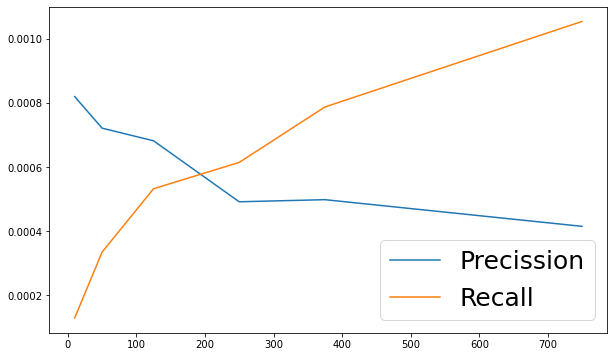

Gràfica evolució precission/recall al llarg de N recomenacions pel model Biased


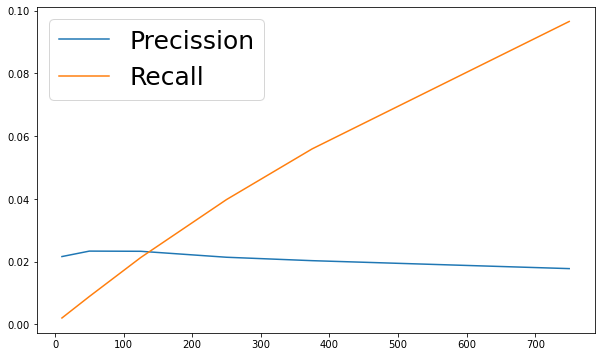

Gràfica evolució precission/recall al llarg de N recomenacions pel model Funk


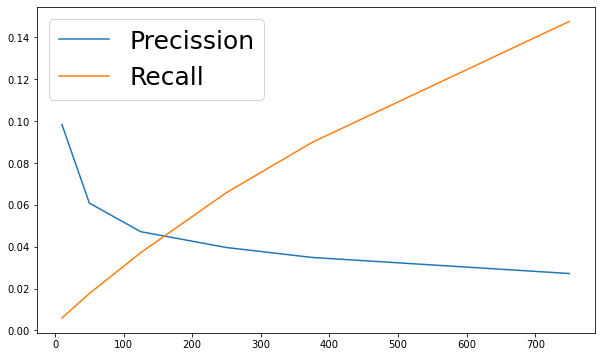

Gràfica evolució precission/recall al llarg de N recomenacions pel model Implicit


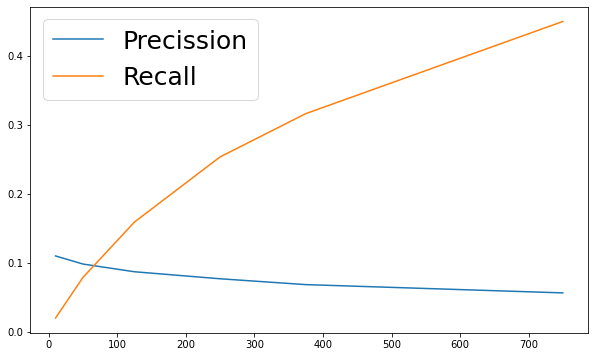

Gràfica evolució precission/recall al llarg de N recomenacions pel model Item


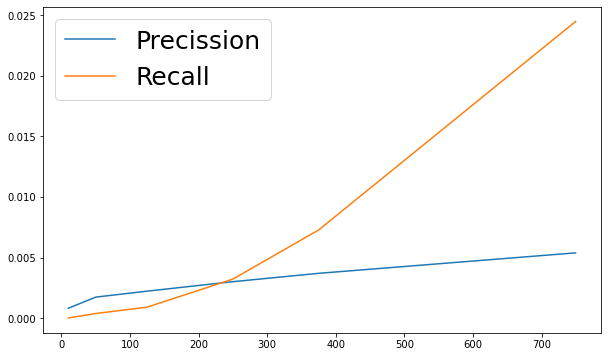

Gràfica evolució precission/recall al llarg de N recomenacions pel model User


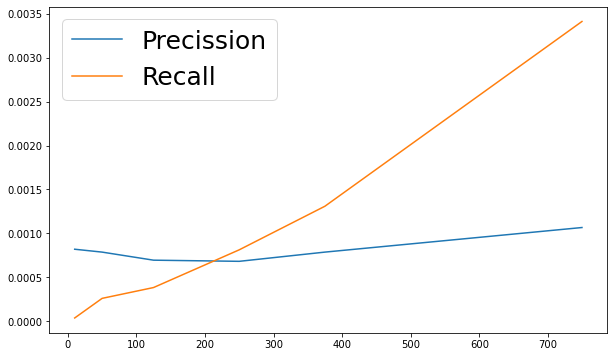

In [27]:
print("SPLIT BASAT EN ROWS\n")
for x,j in zip([i for i in range(6)],['Bias', 'Biased', 'Funk', 'Implicit', 'Item', 'User']):
    print("Gràfica evolució precission/recall al llarg de N recomenacions pel model",j)
    fer_grafica(x,L_models)

SPLIT BASAT EN ROWS

Gràfica precission-recall pel model Bias


<Figure size 720x432 with 0 Axes>

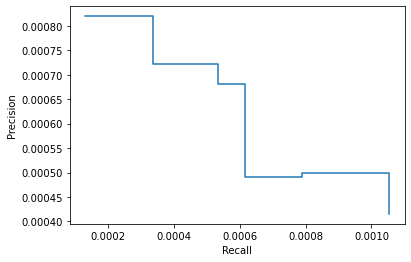

Gràfica precission-recall pel model Biased


<Figure size 720x432 with 0 Axes>

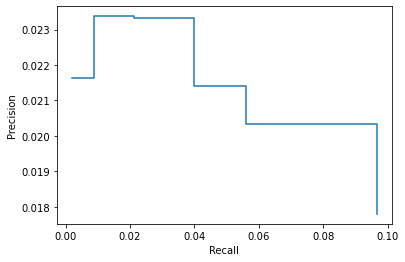

Gràfica precission-recall pel model Funk


<Figure size 720x432 with 0 Axes>

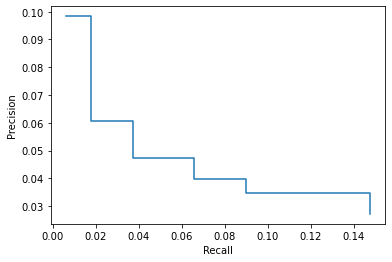

Gràfica precission-recall pel model Implicit


<Figure size 720x432 with 0 Axes>

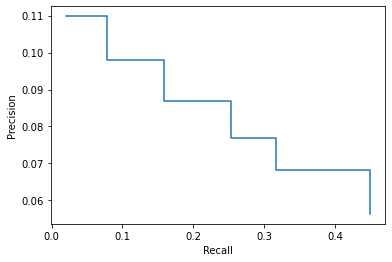

Gràfica precission-recall pel model Item


<Figure size 720x432 with 0 Axes>

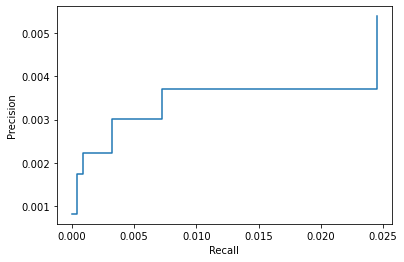

Gràfica precission-recall pel model User


<Figure size 720x432 with 0 Axes>

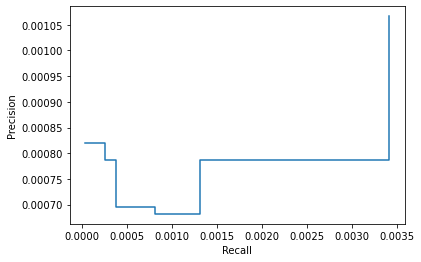

In [28]:
print("SPLIT BASAT EN ROWS\n")
for x,j in zip([i for i in range(6)],['Bias', 'Biased', 'Funk', 'Implicit', 'Item', 'User']):
    print("Gràfica precission-recall pel model",j)
    fer_grafica_prec(x,L_models)

Aquí veiem que a mida que retornem més elements doncs el precission el que fa és disminuir i el recall augmenta.

Tot seguit mirarem que és el que passa si fem servir un split basat en Users amb partició LastFrac que ens va donar uns resultats també bastant acceptables:

També mostrem les gràfiques precission-recall que hem vist a teoria per complementar les respostes.

In [11]:
L_models_userlf = []
metriques = [[topn.precision, {}], [topn.recall, {}]]
for i in [2,10,25,50,75,150]:
    cross = crossvalidar(data.ratings, models, 'user-lf', metriques, n_partitions=5, n_recomenacions=i)
    df_nou = cross.groupby("Algorithm").mean()
    display(df_nou)
    L_models_userlf.append(df_nou)

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:31<00:05,  5.78s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.26s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,2,0.001639,0.000282
Biased,2,0.011475,0.000938
Funk,2,0.047541,0.002245
Implicit,2,0.053279,0.008284
Item,2,0.001639,0.000032
User,2,0.000820,0.000008


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.27s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.27s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,10,0.000656,0.000710
Biased,10,0.012951,0.004601
Funk,10,0.027377,0.007345
Implicit,10,0.046557,0.037546
Item,10,0.001639,0.000223
User,10,0.000820,0.000052


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:23<00:04,  4.39s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:23<00:04,  4.38s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,25,0.000787,0.000855
Biased,25,0.013180,0.013214
Funk,25,0.026295,0.021455
Implicit,25,0.045902,0.083900
Item,25,0.002426,0.000866
User,25,0.000656,0.000133


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:23<00:04,  4.35s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.30s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,50,0.000590,0.001011
Biased,50,0.013639,0.024677
Funk,50,0.023574,0.046247
Implicit,50,0.046197,0.150776
Item,50,0.002721,0.002619
User,50,0.000787,0.000693


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.23s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.27s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,75,0.000503,0.001046
Biased,75,0.013705,0.042867
Funk,75,0.021989,0.067206
Implicit,75,0.044262,0.209477
Item,75,0.003104,0.005099
User,75,0.000787,0.000906


CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: user-lf
Metrics: ['precision', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.28s/it, model=Implicit, train=96367, test=4469]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:22<00:04,  4.31s/it, model=Implicit, train=97109, test=3727]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings opti

,nrecs,precision,recall
Algorithm,,,
Bias,150,0.000470,0.001374
Biased,150,0.012896,0.077539
Funk,150,0.017847,0.109457
Implicit,150,0.039913,0.340972
Item,150,0.004131,0.017573
User,150,0.001016,0.003005


SPLIT BASAT EN USERS AMB PARTICIÓ LAST_FRAC

Gràfica evolució precission/recall al llarg de N recomenacions pel model Bias


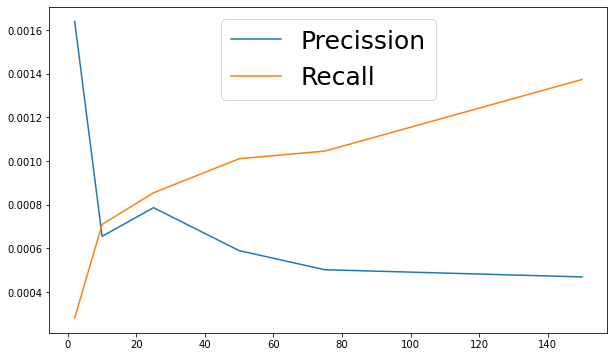

Gràfica evolució precission/recall al llarg de N recomenacions pel model Biased


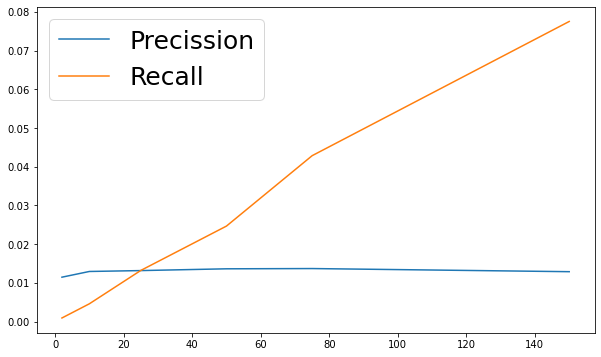

Gràfica evolució precission/recall al llarg de N recomenacions pel model Funk


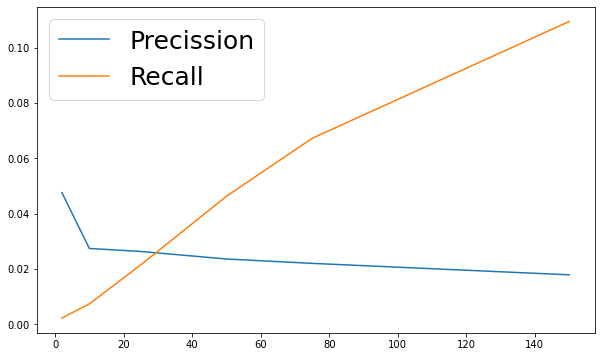

Gràfica evolució precission/recall al llarg de N recomenacions pel model Implicit


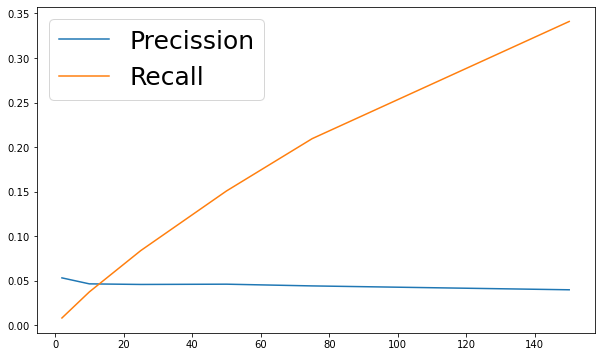

Gràfica evolució precission/recall al llarg de N recomenacions pel model Item


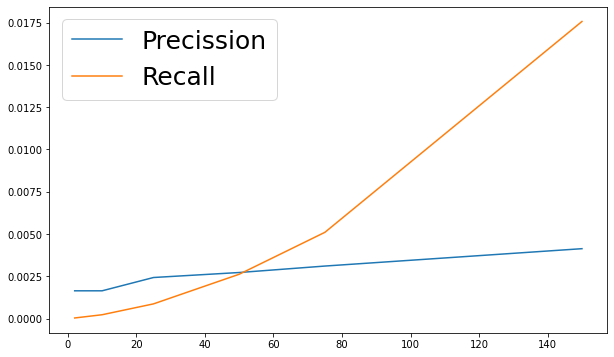

Gràfica evolució precission/recall al llarg de N recomenacions pel model User


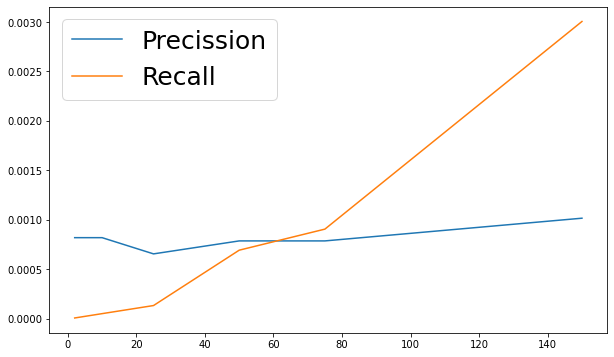

In [22]:
print("SPLIT BASAT EN USERS AMB PARTICIÓ LAST_FRAC\n")
for x,j in zip([i for i in range(6)],['Bias', 'Biased', 'Funk', 'Implicit', 'Item', 'User']):
    print("Gràfica evolució precission/recall al llarg de N recomenacions pel model",j)
    fer_grafica(x,L_models_userlf)

SPLIT BASAT EN USERS AMB PARTICIÓ LAST_FRAC

Gràfica precission-recall pel model Bias


<Figure size 720x432 with 0 Axes>

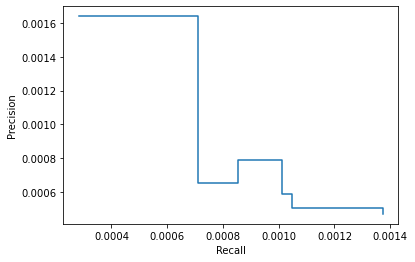

Gràfica precission-recall pel model Biased


<Figure size 720x432 with 0 Axes>

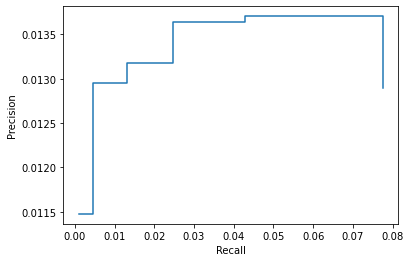

Gràfica precission-recall pel model Funk


<Figure size 720x432 with 0 Axes>

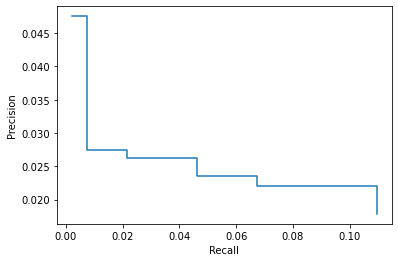

Gràfica precission-recall pel model Implicit


<Figure size 720x432 with 0 Axes>

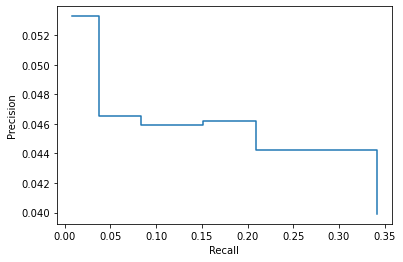

Gràfica precission-recall pel model Item


<Figure size 720x432 with 0 Axes>

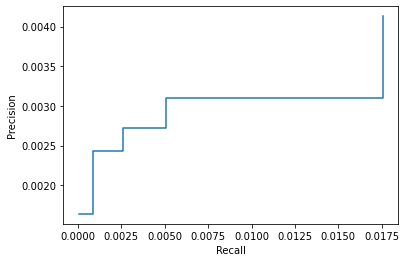

Gràfica precission-recall pel model User


<Figure size 720x432 with 0 Axes>

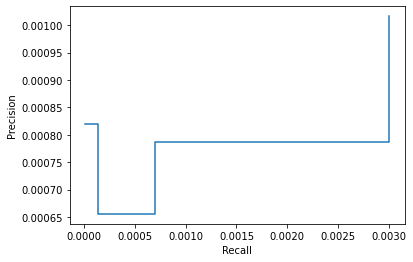

In [21]:
print("SPLIT BASAT EN USERS AMB PARTICIÓ LAST_FRAC\n")
for x,j in zip([i for i in range(6)],['Bias', 'Biased', 'Funk', 'Implicit', 'Item', 'User']):
    print("Gràfica precission-recall pel model",j)
    fer_grafica_prec(x,L_models_userlf)

Per aquest cas veiem un creixement del recall molt més exagerat al llarg de les recomanacions si el comparem amb el cas anterior, osigui que augmenta la quantitat sobre la qualitat, recordem que el recall es més quantitatiu que no pas el precission. Osigui a més recall vol dir que tindrem més elements, seràn aquelles pelis rellevants que s'han retornat, ens mesura la efectivitat del sistema retornant tots els items relevants que existeixen, i per una altra banda el precission ens dirà la fracció de les pelis que s'han retornat que son rellevants. Aquí el tema és que sempre podem incrementar la precissió quan més estrictes siguem amb el que retornem assumint que haguem ordenat les pelis de forma correcta. Pel que fa al recall és bàsicament una funció no decreixent de les pelis retornades que simplement creix a mida que comencem a retornar més i més elements. A més precissió menys elements retornats i a més recall més elements, aleshores sempre es tracta de trobar el punt mig o equilibrar-ho d'alguna forma. Una forma seria amb el F-score que barreja tant precission com recall en un sol valor i per balancejar la importància tenim el paràmetre alfa que ens ajuda a regular el pes de cadascún. Aleshores a més recomanacions (a més pelis retornades) més recall i a menys pelis més precissió normalment.

Si pensem una mica podem veure clarament quan el nostre model necessitarà un alt recall o tot el contrari. Quan necessitem tenir prediccions molt sensibles o delicades com per exemple predir el cancer o predir actes terroristes doncs necessitarem un recall elevat perquè necessitarem cobrir els falsos negatius, és a dir, no passa res si una cel·lula sana es classificada com cancerosa, pero una cel·lula cancerosa mai no l'hauriem de classificar com si fos una cel·lula sana. Aquest és el punt.

Per una altra banda necessitarem una precissió elevada en llocs com sistemes de recomanació com és el nostre cas, o per muntar un sistema de detecció de spam. No ens importen en absolut els falsos negatius sino que només ens importen els vertaders positius i els falsos positius. No ens importa que en un moment donat un missatge spam es coli en la carpeta d'entrada principal, però MAI un missatge important hauria de classificar-se com spam. En aquests sistemes recomanadors amb els que hem treballat en aquesta pràctica el que volem és que els elements que es retornen siguin de qualitat, aleshores la nostra tendència serà sempre a disminuir el nombre de recomanacions perquè al augmentar-lo el que ens passa és que creix el recall i es una característica que en aquest cas no ens convé en absolut. No volem moltes pelis, perquè molt probablement si en retornem moltes, doncs moltes d'elles seràn probablement irrellevants. En volem unes poques però de qualitat, aquesta és més la essència d'aquesta temàtica al meu parer, intentar reduïr al màxim el que una recomanació de qualitat no sigui classificada com a tal.

#### 4. Busca quins parametres afecten a cada model (com a mínim a dos), i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora. [<b>*</b>]()

In [179]:
metriques = [[topn.precision, {}], [topn.precision, {'name':'P@10', 'k':10}], [predict.mae], [predict.rmse], [topn.ndcg, {}], [topn.recall, {}]]
models_opt = {"Bias":Bias(items=True, users=False, damping=0.5), 'Item': ItemItem(nnbrs=10, min_nbrs=1, min_sim=0.001, save_nbrs=20, center=False, aggregate="weighted-average"),
          'User': UserUser(nnbrs=10, min_nbrs=2, min_sim=1e-07, center=True, aggregate="weighted-average"), 'Funk': funksvd.FunkSVD(features=10, iterations=100, lrate=0.003, reg=0.02),
          'Biased': als.BiasedMF(features=10, iterations=80, reg=0.15), 'Implicit': als.ImplicitMF(features=10, iterations=70, reg=0.2, weight=25)}
results_opt = crossvalidar(data.ratings, models_opt, 'row', metriques )
print("Taula amb models optimitzats:")
experiment_optimitzat = results_opt.groupby("Algorithm").mean()
display(experiment_optimitzat)

CROSSVALIDATION
Data: (100836, 4)
Models: ['Bias', 'Item', 'User', 'Funk', 'Biased', 'Implicit']
Splitting: row
Metrics: ['precision', 'precision', 'mae', 'rmse', 'ndcg', 'recall']


[fold 1 of 5]:  83%|████████▎ | 5/6 [00:27<00:05,  5.17s/it, model=Implicit, train=80668, test=20168]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings option for consistent behavior
see http://bit.ly/lkpy-imf for details
C:\Users\usuario\anaconda3\lib\site-packages\lenskit\algorithms\als.py:667: UserWarning: Fitting Implicit ALS with ratings and defaults; the default behavior in this
scenario will change in LensKit 0.14. Specify the use_ratings option to
ImplicitMF to get consistent behavior in the future. See the documentation
at http://bit.ly/lkpy-imf for more details.
  warnings.warn(util.clean_str('''
[fold 2 of 5]:  83%|████████▎ | 5/6 [00:26<00:05,  5.12s/it, model=Implicit, train=80669, test=20167]fitting an Implicit ALS model with ratings and default settings
in LensKit 0.14, the default behavior for this scenario will change
explicitly specify the use_ratings op

Taula amb models optimitzats:


,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,49.967213,0.001082,0.005410,0.000704,0.000213,0.786322,0.969654
Biased,49.967213,0.023246,0.116230,0.021380,0.008659,0.701300,0.883976
Funk,49.967213,0.063672,0.318361,0.063949,0.021442,0.690199,0.868194
Implicit,49.967213,0.122033,0.610000,0.185074,0.090116,2.883639,3.046942
Item,49.967213,0.019557,0.097705,0.026507,0.012517,0.728441,0.938088
User,49.967213,0.002033,0.010164,0.001004,0.000390,0.713383,0.906413


In [180]:
print("Taula del experiment original (models sense modificar paràmetres):")
display(experiment_original)

Taula del experiment original (models sense modificar paràmetres):


,nrecs,precision,P@10,ndcg,recall,mae,rmse
Algorithm,,,,,,,
Bias,49.967213,0.000721,0.003607,0.000840,0.000335,0.711768,0.896681
Biased,49.967213,0.022893,0.114426,0.023063,0.009403,0.702022,0.886173
Funk,49.967213,0.060984,0.304918,0.053985,0.017592,0.697426,0.876327
Implicit,49.967213,0.099713,0.498525,0.156348,0.079483,2.850840,3.016265
Item,49.967213,0.001738,0.008689,0.000898,0.000386,0.695955,0.884904
User,49.967213,0.000787,0.003934,0.000534,0.000260,0.717221,0.912736


In [183]:
print("Millora obtinguda al optimitzar: (%)")
dic = {}
for i in experiment_original:
    if i == 'nrecs':
        continue
    dic[i] = list((1-experiment_original[i]/experiment_optimitzat[i])*100)
taula_millora = pd.DataFrame(dic)
taula_millora.index = ['Bias', 'Biased', 'Funk', 'Implicit', 'Item', 'User']
display(taula_millora)

Millora obtinguda al optimitzar: (%)


,precision,P@10,ndcg,recall,mae,rmse
Bias,33.333333,33.333333,-19.311530,-57.055625,9.481381,7.525678
Biased,1.516220,1.551481,-7.870138,-8.595511,-0.103034,-0.248483
Funk,4.222451,4.222451,15.582288,17.954305,-1.046980,-0.936739
Implicit,18.289898,18.274657,15.521382,11.798989,1.137410,1.006821
Item,91.114837,91.107383,96.612848,96.918763,4.459723,5.669414
User,61.290323,61.290323,46.839237,33.323548,-0.538019,-0.697550


En base al precision i al P@10 els he millorat tots, no s'especifica en quines mètriques ens hauriem de fixar més, i pel que fa al split tampoc diu res, jo he agafat el que ens havia donat uns millor resultats, el row. Hauria de treballar una mica més amb el biased perquè la millora és bastant petita però crec que he fet el que em demana el exercici malgrat el temps que triga l'exercici en executar-se al meu ordinador.

El més sorprenent potser sigui el Item, puja un 91% el precision i un 96% el recall, tant la quantitat com la qualitat diguem.